In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

df = pd.read_csv('Dataset/train-balanced-sarcasm.csv')
df

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...


In [ ]:
df.to_parquet('train-balanced-sarcasm.parquet')

In [ ]:
df = pd.read_parquet('train-balanced-sarcasm.parquet')
df

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...


In [ ]:
'''To check whether the class_label is balanced or not '''

df['label'].value_counts()

0    505413
1    505413
Name: label, dtype: int64

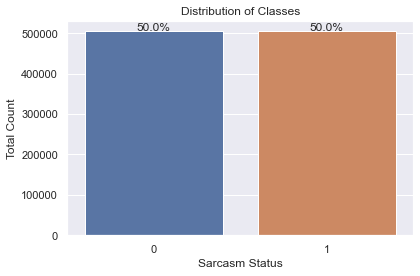

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()

#
axes = sns.countplot(data = df, 
                     x    = 'label')

axes.set(title  = 'Distribution of Classes', 
         xlabel = 'Sarcasm Status', 
         ylabel = 'Total Count')

#
total = float(len(df))
for p in axes.patches:
    height = p.get_height()
    axes.text(p.get_x() + p.get_width() / 2.,
              height + 3,
              '{:1.1f}%'.format((height / total) * 100),
              ha = "center") 
              
plt.tight_layout()
plt.show()

<pre>
Observations:
<pre>
Perfectly balanced! 
This points us to consider accuracy as one of our key performance metrics in the modelling part, as it is easy to interpret. 
However we also want to check the model performance based on another metric like precision or recall.

In [ ]:
'''Checking for null_values'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010826 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010826 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010826 non-null  object
 3   subreddit       1010826 non-null  object
 4   score           1010826 non-null  int64 
 5   ups             1010826 non-null  int64 
 6   downs           1010826 non-null  int64 
 7   date            1010826 non-null  object
 8   created_utc     1010826 non-null  object
 9   parent_comment  1010826 non-null  object
dtypes: int64(4), object(6)
memory usage: 77.1+ MB


In [ ]:
# check for null values 
print("Does it has any null values in the dataset ? Ans :",df.isna().values.any())

Does it has any null values in the dataset ? Ans : True


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010773 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010773 non-null  int64 
 1   comment         1010773 non-null  object
 2   author          1010773 non-null  object
 3   subreddit       1010773 non-null  object
 4   score           1010773 non-null  int64 
 5   ups             1010773 non-null  int64 
 6   downs           1010773 non-null  int64 
 7   date            1010773 non-null  object
 8   created_utc     1010773 non-null  object
 9   parent_comment  1010773 non-null  object
dtypes: int64(4), object(6)
memory usage: 84.8+ MB


In [ ]:
# check for null values 
print("Does it has any null values in the dataset ? Ans :",df.isna().values.any())

Does it has any null values in the dataset ? Ans : False


In [ ]:
# check duplicate rows
print('Number of Duplicate rows in the dataset:', len(df[df.duplicated() == True]))

Number of Duplicate rows in the dataset: 28


In [ ]:
# removing duplicate rows
df.drop_duplicates(keep = 'first', inplace = True)

In [ ]:
# check duplicate rows
print('Number of Duplicate rows in the dataset:', len(df[df.duplicated() == True]))

Number of Duplicate rows in the dataset: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010745 entries, 0 to 1010825
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   label           1010745 non-null  int64 
 1   comment         1010745 non-null  object
 2   author          1010745 non-null  object
 3   subreddit       1010745 non-null  object
 4   score           1010745 non-null  int64 
 5   ups             1010745 non-null  int64 
 6   downs           1010745 non-null  int64 
 7   date            1010745 non-null  object
 8   created_utc     1010745 non-null  object
 9   parent_comment  1010745 non-null  object
dtypes: int64(4), object(6)
memory usage: 84.8+ MB


In [ ]:
''' add "id" column '''
df.insert(0, 'id', range(1, 1 + len(df)))

In [ ]:
df.reset_index(drop = True)

,id,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,1,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,2,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,3,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,4,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,5,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...,...
1010740,1010741,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010741,1010742,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010742,1010743,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010743,1010744,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...


<pre><font color = 'red'><b>Distribution of features</b><font>

<pre><font color = 'blue'><b>"comment" feature</b><font>

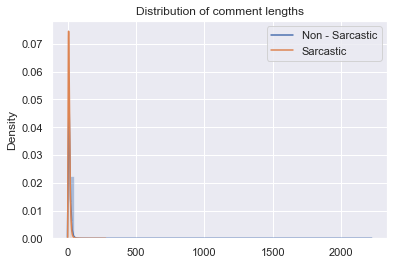

In [ ]:
''' no of words in each "comment" '''

df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]

# distplot on label column for both classes
comment_length_0 = [len(x) for x in df_0['comment'].astype(str).str.split(' ') if x != None]
comment_length_1 = [len(x) for x in df_1['comment'].astype(str).str.split(' ') if x != None]

sns.distplot(comment_length_0)
sns.distplot(comment_length_1)

plt.title('Distribution of comment lengths')
plt.legend(['Non - Sarcastic', 'Sarcastic'])
plt.grid(True)
plt.show()

<pre>
Observations:
<pre>
Can't get better understanding, So trying to focus further..

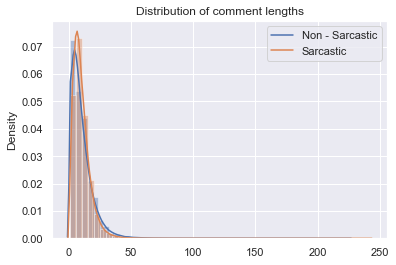

In [ ]:
''' Focusing between 0 - 250 words '''

df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]

# distplot on label column for both classes
comment_length_0 = [len(x) for x in df_0['comment'].astype(str).str.split(' ') if x != None and len(x) < 250]
comment_length_1 = [len(x) for x in df_1['comment'].astype(str).str.split(' ') if x != None and len(x) < 250]

sns.distplot(comment_length_0)
sns.distplot(comment_length_1)

plt.title('Distribution of comment lengths')
plt.legend(['Non - Sarcastic', 'Sarcastic'])
plt.grid(True)
plt.show()

<pre>
Observations:
<pre>
Here we can see that most of the comments have less than 50 words in it.

In [ ]:
import numpy as np

In [ ]:
# Percentile on comment length

comment_length = [len(x) for x in df['comment'].str.split(' ') if x != None and len(x) < 250]

for i in range(0, 110, 10):
    print('For percentile : ', i, ', length of the "comment" is', np.percentile(comment_length, i))
    print('=' * 60)

For percentile :  0 , length of the "comment" is 1.0
For percentile :  10 , length of the "comment" is 3.0
For percentile :  20 , length of the "comment" is 4.0
For percentile :  30 , length of the "comment" is 6.0
For percentile :  40 , length of the "comment" is 7.0
For percentile :  50 , length of the "comment" is 9.0
For percentile :  60 , length of the "comment" is 10.0
For percentile :  70 , length of the "comment" is 12.0
For percentile :  80 , length of the "comment" is 15.0
For percentile :  90 , length of the "comment" is 20.0
For percentile :  100 , length of the "comment" is 242.0


In [ ]:
# Percentile on comment length

comment_length = [len(x) for x in df['comment'].str.split(' ') if x != None and len(x) < 250]

for i in range(90, 101):
    print('For percentile : ', i, ', length of the "comment" is', np.percentile(comment_length, i))
    print('=' * 60)

For percentile :  90 , length of the "comment" is 20.0
For percentile :  91 , length of the "comment" is 21.0
For percentile :  92 , length of the "comment" is 22.0
For percentile :  93 , length of the "comment" is 23.0
For percentile :  94 , length of the "comment" is 24.0
For percentile :  95 , length of the "comment" is 25.0
For percentile :  96 , length of the "comment" is 27.0
For percentile :  97 , length of the "comment" is 29.0
For percentile :  98 , length of the "comment" is 32.0
For percentile :  99 , length of the "comment" is 38.0
For percentile :  100 , length of the "comment" is 242.0


<pre>
Observations:
<pre>
So at the preprocessing step we could pad all of our sentence to 40 words, as 99% of comments have less than 38 words in it.

<pre><font color = 'blue'><b>"parent_comment" feature</b><font>

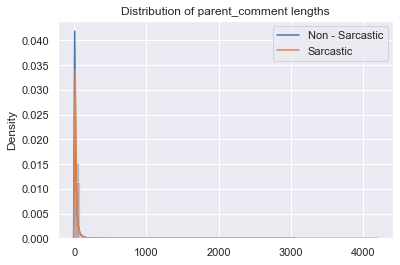

In [ ]:
''' no of words in each "comment" '''

df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]

# distplot on label column for both classes
parent_comment_length_0 = [len(x) for x in df_0['parent_comment'].astype(str).str.split(' ') if x != None]
parent_comment_length_1 = [len(x) for x in df_1['parent_comment'].astype(str).str.split(' ') if x != None]

sns.distplot(parent_comment_length_0)
sns.distplot(parent_comment_length_1)

plt.title('Distribution of parent_comment lengths')
plt.legend(['Non - Sarcastic', 'Sarcastic'])
plt.grid(True)
plt.show()

<pre>
Observations:
<pre>
Can't get better understanding, So trying to focus further..

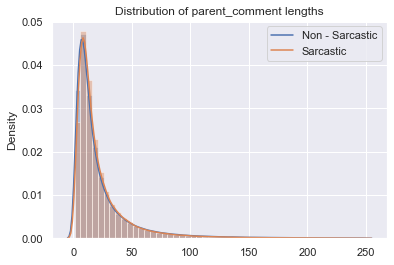

In [ ]:
''' Focusing between 0 - 250 words '''

df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]

# distplot on label column for both classes
parent_comment_length_0 = [len(x) for x in df_0['parent_comment'].astype(str).str.split(' ') if x != None and len(x) < 250]
parent_comment_length_1 = [len(x) for x in df_1['parent_comment'].astype(str).str.split(' ') if x != None and len(x) < 250]

sns.distplot(parent_comment_length_0)
sns.distplot(parent_comment_length_1)

plt.title('Distribution of parent_comment lengths')
plt.legend(['Non - Sarcastic', 'Sarcastic'])
plt.grid(True)
plt.show()

<pre>
Observations:
<pre>
Here we can see that most of the comments have less than 100 words in it.

In [ ]:
import numpy as np

In [ ]:
# Percentile on comment length

parent_comment_length = [len(x) for x in df['parent_comment'].str.split(' ') if x != None and len(x) < 250]

for i in range(0, 110, 10):
    print('For percentile : ', i, ', length of the "parent_comment" is', np.percentile(parent_comment_length, i))
    print('=' * 65)

For percentile :  0 , length of the "parent_comment" is 1.0
For percentile :  10 , length of the "parent_comment" is 4.0
For percentile :  20 , length of the "parent_comment" is 7.0
For percentile :  30 , length of the "parent_comment" is 9.0
For percentile :  40 , length of the "parent_comment" is 11.0
For percentile :  50 , length of the "parent_comment" is 13.0
For percentile :  60 , length of the "parent_comment" is 17.0
For percentile :  70 , length of the "parent_comment" is 22.0
For percentile :  80 , length of the "parent_comment" is 31.0
For percentile :  90 , length of the "parent_comment" is 50.0
For percentile :  100 , length of the "parent_comment" is 249.0


In [ ]:
# Percentile on comment length

parent_comment_length = [len(x) for x in df['parent_comment'].str.split(' ') if x != None and len(x) < 250]

for i in range(90, 101):
    print('For percentile : ', i, ', length of the "parent_comment" is', np.percentile(parent_comment_length, i))
    print('=' * 65)

For percentile :  90 , length of the "parent_comment" is 50.0
For percentile :  91 , length of the "parent_comment" is 53.0
For percentile :  92 , length of the "parent_comment" is 57.0
For percentile :  93 , length of the "parent_comment" is 61.0
For percentile :  94 , length of the "parent_comment" is 67.0
For percentile :  95 , length of the "parent_comment" is 74.0
For percentile :  96 , length of the "parent_comment" is 82.0
For percentile :  97 , length of the "parent_comment" is 94.0
For percentile :  98 , length of the "parent_comment" is 113.0
For percentile :  99 , length of the "parent_comment" is 146.0
For percentile :  100 , length of the "parent_comment" is 249.0


<pre>
Observations:
<pre>
So at the preprocessing step we could pad all of our sentence to 150 words, as 99% of comments have less than 146 words in it.

<pre><font color = 'blue'><b>"score" feature</b><font>

In [ ]:
print('Minimum_score :', df['score'].min())
print('Maximum_score :', df['score'].max())

Minimum_score : -507
Maximum_score : 9070


<pre>
Observations:
<pre>
Over here score columns varies from -507 to 9070. 
Usually the comments which are insensitive or irrelevant gets down voted in the reddit and relevant gets up voted. 
So "score" could be the important factor over here.

<pre><font color = 'blue'><b>"ups" feature</b><font>

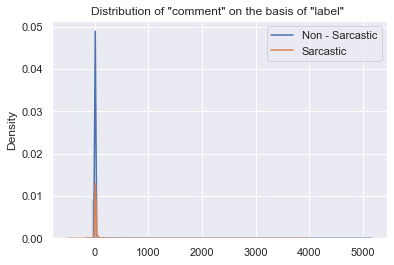

In [ ]:
df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]

# distplot on label column for both classes
ups_0 = [df_0['ups']]
ups_1 = [df_1['ups']]

sns.distplot(ups_0)
sns.distplot(ups_1)

plt.title('Distribution of "comment" on the basis of "label" ')
plt.legend(['Non - Sarcastic', 'Sarcastic'])
plt.grid(True)
plt.show()

In [ ]:
# percentile on ups column
for i in range(0, 110, 10):
    print('For percentile : ', i, ', length of the "comment" is', np.percentile(df['ups'], i))
    print('=' * 60)

For percentile :  0 , length of the "comment" is -507.0
For percentile :  10 , length of the "comment" is -1.0
For percentile :  20 , length of the "comment" is -1.0
For percentile :  30 , length of the "comment" is 1.0
For percentile :  40 , length of the "comment" is 1.0
For percentile :  50 , length of the "comment" is 1.0
For percentile :  60 , length of the "comment" is 2.0
For percentile :  70 , length of the "comment" is 3.0
For percentile :  80 , length of the "comment" is 5.0
For percentile :  90 , length of the "comment" is 10.0
For percentile :  100 , length of the "comment" is 5163.0


<pre>
Observations:
<pre>
Here the "ups" feature consist some negative samples (i.e., -507, -1) 
This could be considered as outlier point as "ups" feature should only consist positive number.
So we could remove those points at preprocessing step.

<pre><font color = 'blue'><b>"downs" feature</b><font>

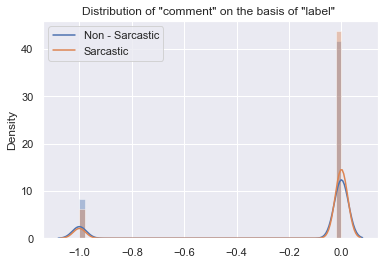

In [ ]:
df_0 = df[df['label'] == 0]
df_1 = df[df['label'] == 1]

# distplot on label column for both classes
downs_0 = [df_0['downs']]
downs_1 = [df_1['downs']]

sns.distplot(downs_0)
sns.distplot(downs_1)

plt.title('Distribution of "comment" on the basis of "label" ')
plt.legend(['Non - Sarcastic', 'Sarcastic'])
plt.grid(True)
plt.show()

In [ ]:
# percentile on downs column
for i in range(0, 110, 10):
    print('For percentile : ', i, ', length of the "comment" is', np.percentile(df['downs'], i))
    print('=' * 60)

For percentile :  0 , length of the "comment" is -1.0
For percentile :  10 , length of the "comment" is -1.0
For percentile :  20 , length of the "comment" is 0.0
For percentile :  30 , length of the "comment" is 0.0
For percentile :  40 , length of the "comment" is 0.0
For percentile :  50 , length of the "comment" is 0.0
For percentile :  60 , length of the "comment" is 0.0
For percentile :  70 , length of the "comment" is 0.0
For percentile :  80 , length of the "comment" is 0.0
For percentile :  90 , length of the "comment" is 0.0
For percentile :  100 , length of the "comment" is 0.0


<pre>
Observations:
<pre>
Here the "downs" feature consist only of negative samples which is good beacuse the "downs" feature should contain values less than or equal to zero.
So, there are no outliers present in the downs columns, as all the points are negative or equal to zero.

<pre><font color = 'red'><b>WordCloud for Sarcastic and Non-Sarcastic "comment"</b><font>

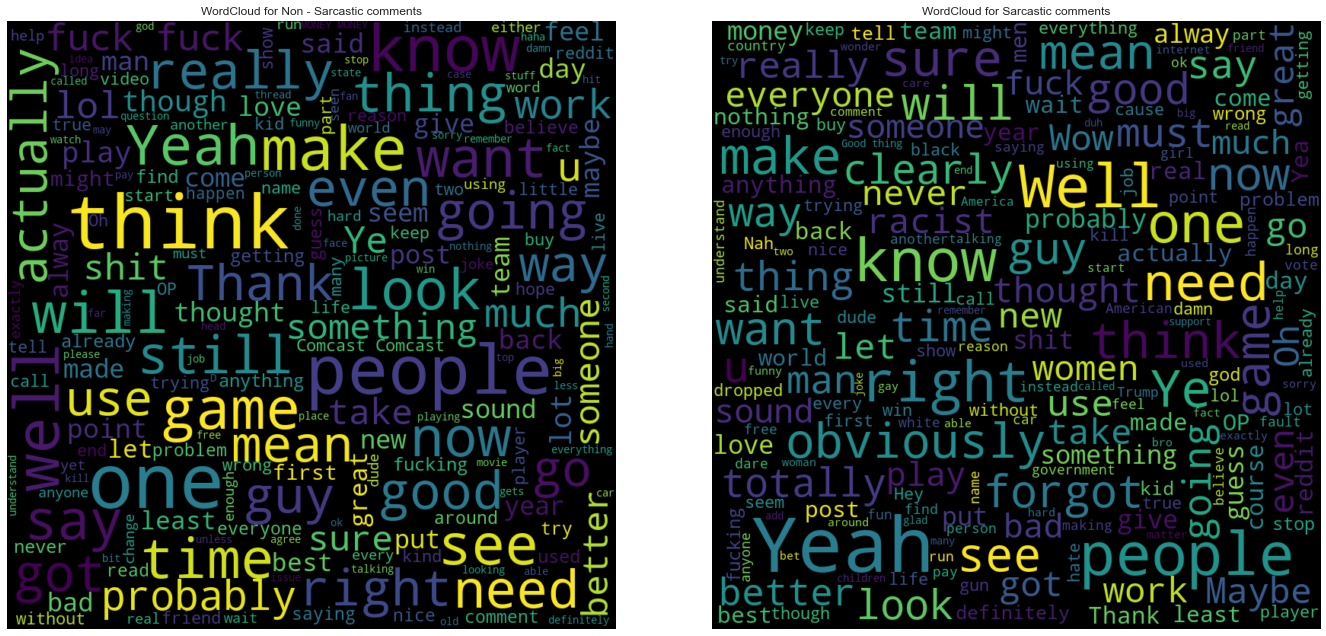

In [ ]:
from wordcloud import WordCloud, STOPWORDS

#
plt.figure(figsize = (20, 9))

# WordCloud 1
comment_words_1 = " ".join(df[df['label'] == 0]['comment'].fillna('none').values)
                
wordcloud_1 = WordCloud(width            = 800, 
                        height           = 800, 
                        stopwords        = STOPWORDS, 
                        random_state     = 21, 
                        max_font_size    = 100).generate(comment_words_1)

plt.subplot(1, 2, 1)
plt.title('WordCloud for Non - Sarcastic comments')
plt.imshow(wordcloud_1, interpolation = 'bilinear')
plt.axis('off')

# WordCloud 2
comment_words_2 = " ".join(df[df['label'] == 1]['comment'].fillna('none').values)
                
wordcloud_2 = WordCloud(width            = 800, 
                        height           = 800, 
                        stopwords        = STOPWORDS,
                        random_state     = 21, 
                        max_font_size    = 100).generate(comment_words_2)

plt.subplot(1, 2, 2)
plt.title('WordCloud for Sarcastic comments')
plt.imshow(wordcloud_2, interpolation = 'bilinear')
plt.axis('off')

plt.tight_layout() # to avoid overlap
plt.show()

<pre>
Observations:
<pre>
No valuable insight could be derive from both the wordcloud.

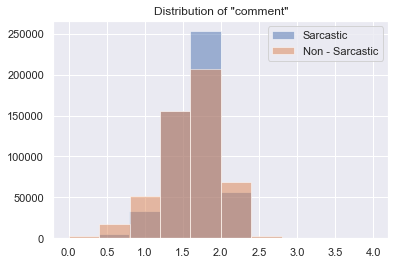

In [ ]:
''' Distribution of lengths of "comment" feature ''' 

df.loc[df['label'] == 1, 'comment'].str.len().apply(np.log10).hist(label = 'Sarcastic', alpha = 0.5)
df.loc[df['label'] == 0, 'comment'].str.len().apply(np.log10).hist(label = 'Non - Sarcastic', alpha = 0.5)

plt.title('Distribution of "comment" ')
plt.legend()
plt.show()

<pre>
Observations:
<pre>
There is a lot of overlap in the lengths of Sarcastic and Non-Sarcastic "comment". 
No clear distinction.

<pre><font color = 'red'><b>WordCloud for Sarcastic and Non-Sarcastic "parent_comment"</b><font>

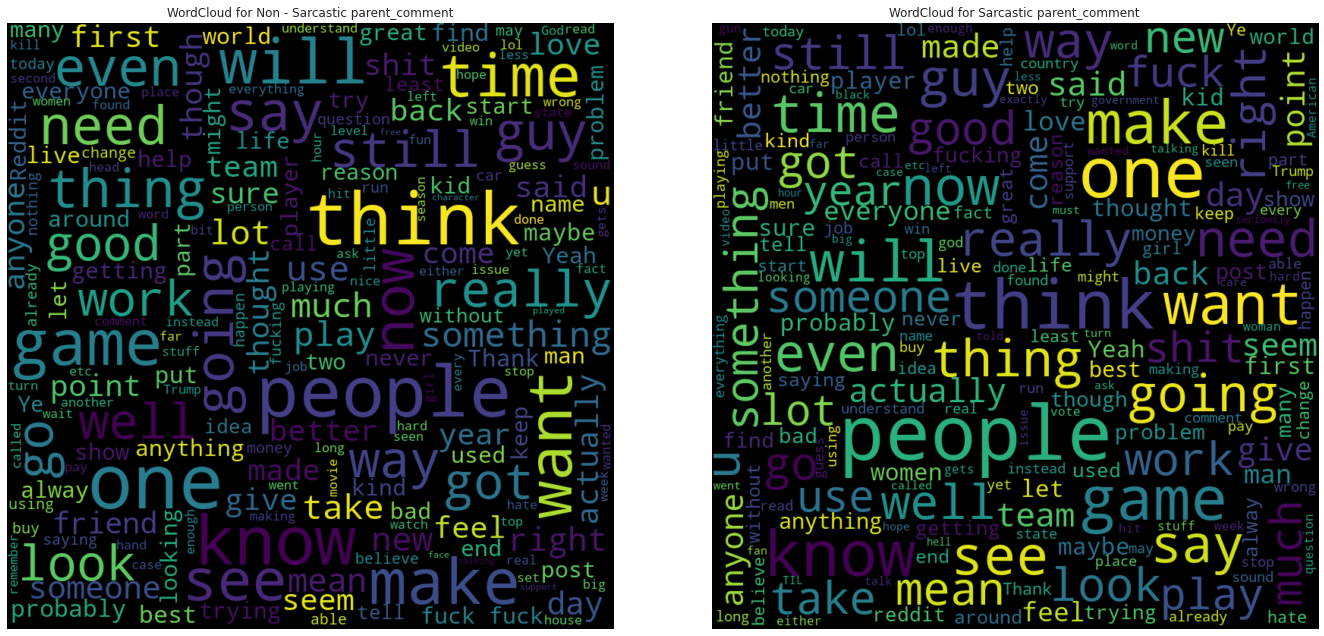

In [ ]:
from wordcloud import WordCloud, STOPWORDS

#
plt.figure(figsize = (20, 9))

# WordCloud 1
parent_comment_words_1 = " ".join(df[df['label'] == 0]['parent_comment'].fillna('none').values)
                
wordcloud_1 = WordCloud(width            = 800, 
                        height           = 800, 
                        stopwords        = STOPWORDS, 
                        random_state     = 21, 
                        max_font_size    = 100).generate(parent_comment_words_1)

plt.subplot(1, 2, 1)
plt.title('WordCloud for Non - Sarcastic parent_comment')
plt.imshow(wordcloud_1, interpolation = 'bilinear')
plt.axis('off')

# WordCloud 2
parent_comment_words_2 = " ".join(df[df['label'] == 1]['parent_comment'].fillna('none').values)
                
wordcloud_2 = WordCloud(width            = 800, 
                        height           = 800, 
                        stopwords        = STOPWORDS,
                        random_state     = 21, 
                        max_font_size    = 100).generate(parent_comment_words_2)

plt.subplot(1, 2, 2)
plt.title('WordCloud for Sarcastic parent_comment')
plt.imshow(wordcloud_2, interpolation = 'bilinear')
plt.axis('off')

plt.tight_layout() # to avoid overlap
plt.show()

<pre>
Observations:
<pre>
No valuable insight could be derive from both the wordcloud.

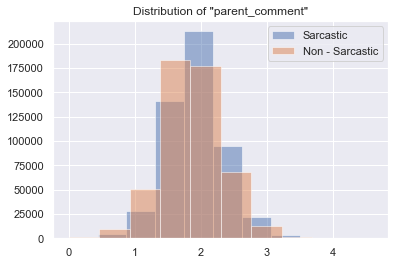

In [ ]:
''' Distribution of lengths of "parent_comment" feature ''' 

df.loc[df['label'] == 1, 'parent_comment'].str.len().apply(np.log10).hist(label = 'Sarcastic', alpha = 0.5)
df.loc[df['label'] == 0, 'parent_comment'].str.len().apply(np.log10).hist(label = 'Non - Sarcastic', alpha = 0.5)

plt.title('Distribution of "parent_comment"')
plt.legend()
plt.show()

<pre>
Observations:
<pre>
There is a lot of overlap in the lengths of Sarcastic and Non-Sarcastic "parent_comment". 
No clear distinction.

<pre><font color = 'red'><b>In this EDA we try to figure out the top 20 values of respective features which tends to be more sarcastic or not</b><font>

In [ ]:
def plot(df_1, df_2, column_name, x_label, y_label):
    
    #
    figure, axes = plt.subplots(1, 2, figsize = (20, 9))
    
    # plot 1
    sns.barplot(x     = df_1['c_1'],
                y     = df_1['c_2'],
                ax    = axes[0]).set_title('Top 20 Non - Sarcastic ' + column_name)

    axes[0].grid(color = 'black', linewidth = 0.1)
    axes[0].set_xlabel(x_label)
    axes[0].set_ylabel(y_label)

    # plot 2
    sns.barplot(x     = df_2['c_1'], 
                y     = df_2['c_2'], 
                ax    = axes[1]).set_title('Top 20 Sarcastic ' + column_name)

    axes[1].grid(color = 'black', linewidth = 0.1)
    axes[1].set_xlabel(x_label)
    axes[1].set_ylabel(y_label)

    plt.tight_layout() # to avoid overlap
    plt.show()

    return 

<pre><font color = 'blue'><b>Top 20 "comment"</b><font>

In [ ]:
''' Top 20 comment '''

non_sarcasm = df[df['label'] == 0]['comment']
comment_ns = pd.DataFrame(non_sarcasm.value_counts()[ : 20]).reset_index().rename({'index' : 'Top 20 Non-sarcastic comment', 'comment' : 'Total counts'}, axis = 'columns')

sarcasm = df[df['label'] == 1]['comment']
comment_s = pd.DataFrame(sarcasm.value_counts()[:20]).reset_index().rename({'index' : 'Top 20 Sarcastic comment', 'comment' : 'Total counts'}, axis = 'columns')

pd.concat([comment_ns, comment_s], axis = 1)

,Top 20 Non-sarcastic comment,Total counts,Top 20 Sarcastic comment,Total counts
0,Yes,406,You forgot the,1451
1,Yes.,396,you forgot the,456
2,Thanks!,381,You dropped this:,343
3,No.,281,You forgot your,329
4,lol,219,You forgot,283
5,Thank you!,215,Forgot the,273
6,No,214,You dropped this,242
7,:(,191,I think you forgot the,159
8,Source?,182,I forgot the,158
9,What?,178,You forgot this:,155


<pre>
Observations:
<pre>
In Non - Sarcastic comment, 'Yes', 'Yes.', 'Thanks!' comments appears more than 350 times.
In Sarcastic comment, 'You forgot the' comment appears more than 1400 times.

<pre><font color = 'blue'><b>Top 20 "parent_comment"</b><font>

In [ ]:
''' Top 20 parent_comment '''

non_sarcasm = df[df['label'] == 0]['parent_comment']
parent_comment_ns = pd.DataFrame(non_sarcasm.value_counts()[ : 20]).reset_index().rename({'index' : 'Top 20 Non-sarcastic parent_comment', 'parent_comment' : 'Total counts'}, axis = 'columns')

sarcasm = df[df['label'] == 1]['parent_comment']
parent_comment_s = pd.DataFrame(sarcasm.value_counts()[:20]).reset_index().rename({'index' : 'Top 20 Sarcastic parent_comment', 'parent_comment' : 'Total counts'}, axis = 'columns')

pd.concat([parent_comment_ns, parent_comment_s], axis = 1)

,Top 20 Non-sarcastic parent_comment,Total counts,Top 20 Sarcastic parent_comment,Total counts
0,me irl,228,Why?,148
1,Cat.,134,No.,67
2,"If I get 100 upvotes, I'll buy everyone who up...",92,Yes.,45
3,Why?,84,What?,39
4,Yes.,76,No,37
5,No.,73,How so?,36
6,What?,69,Source?,35
7,Yes,67,Yes,31
8,F,60,me irl,29
9,?,54,why?,28


<pre>
Observations:
<pre>
In Non - Sarcastic parent_comment, ‘me irl’ comment appears more than 200 times.
In Sarcastic comment, ‘Why?’ comment appears nearly 150 times.

<pre><font color = 'blue'><b>Top 20 "comment" words</b><font>

In [ ]:
''' Top 20 comment words '''

from collections import Counter
cnt = Counter()

#
for text in df[df['label'] == 0]["comment"].values:
    for word in text.split():
        cnt[word] += 1
        
comment_words_ns = pd.DataFrame(cnt.most_common(20), columns = ['c_1', 'c_2'])

#
for text in df[df['label'] == 1]["comment"].values:
    for word in text.split():
        cnt[word] += 1
        
comment_words_s = pd.DataFrame(cnt.most_common(20), columns = ['c_1', 'c_2'])

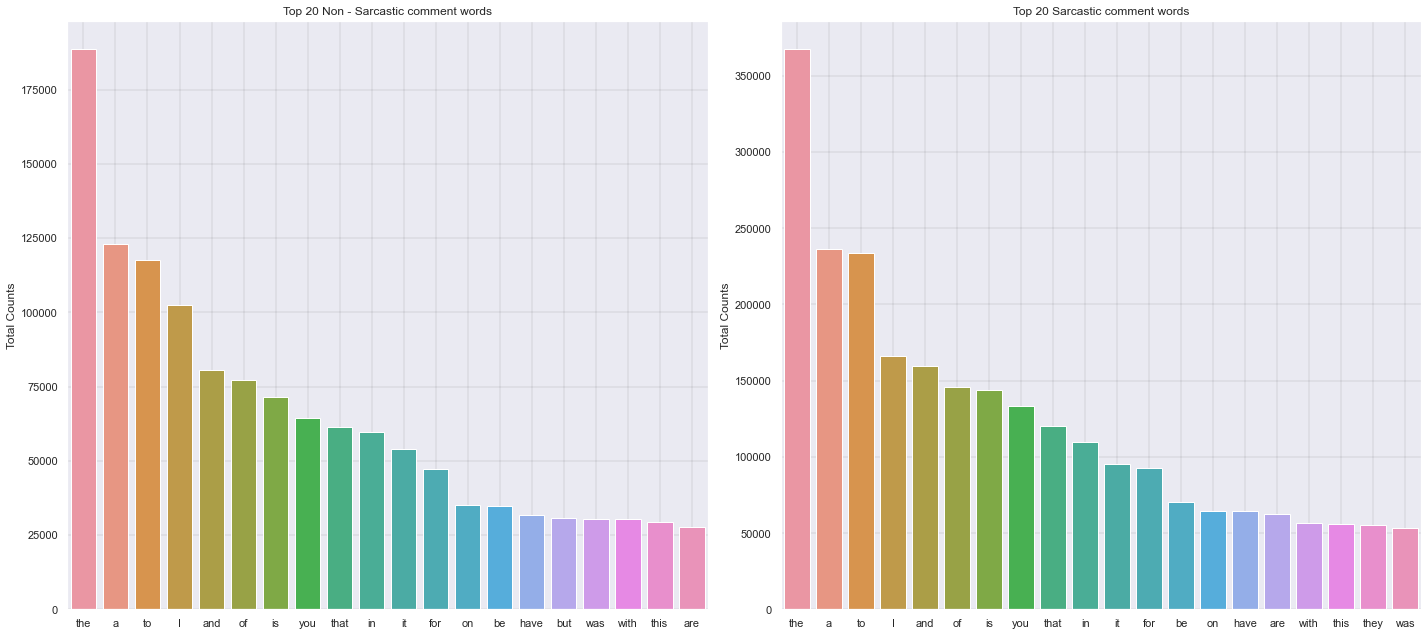

In [ ]:
plot(df_1        = comment_words_ns, 
     df_2        = comment_words_s, 
     column_name = 'comment words', 
     x_label     = '', 
     y_label     = 'Total Counts')

<pre>
Observations:
<pre>
In Non - Sarcastic comment, the word 'the' appears more than 1,75,000 times.
In Sarcastic comment, the word 'the' appears more than 3,50,000 times.

<pre><font color = 'blue'><b>Top 20 "parent_comment" words</b><font>

In [ ]:
''' Top 20 parent_comment words '''

from collections import Counter
cnt = Counter()

#
for text in df[df['label'] == 0]['parent_comment'].values:
    for word in text.split():
        cnt[word] += 1
        
parent_comment_words_ns = pd.DataFrame(cnt.most_common(20), columns = ['c_1', 'c_2'])

#
for text in df[df['label'] == 1]['parent_comment'].values:
    for word in text.split():
        cnt[word] += 1
        
parent_comment_words_s = pd.DataFrame(cnt.most_common(20), columns = ['c_1', 'c_2'])

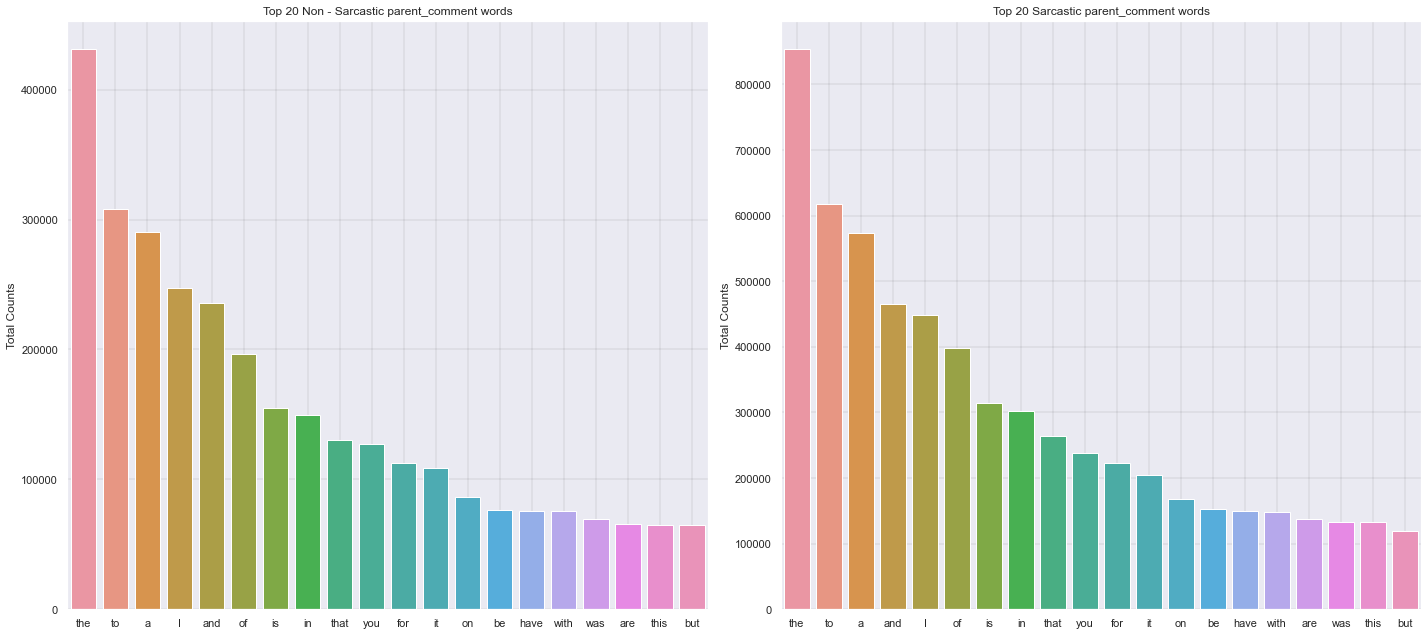

In [ ]:
plot(df_1        = parent_comment_words_ns, 
     df_2        = parent_comment_words_s, 
     column_name = 'parent_comment words', 
     x_label     = '', 
     y_label     = 'Total Counts')

<pre>
Observations:
<pre>
In Non - Sarcastic ‘parent_comment’, the word ‘the’ appears more than 4,00,000 times.
In Sarcastic ‘parent_comment’, the word ‘the’ appears more than 8,00,000 times.

<pre><font color = 'blue'><b>Top 20 "comment" lengths</b><font>

In [ ]:
''' Top 20 comment lengths ''' 

columns_titles = ['c_1','c_2']

df['words'] = df['comment'].str.split().apply(len)

non_sarcasm = df[df['label'] == 0]['words']
comment_wordlength_ns = pd.DataFrame(non_sarcasm.value_counts()[:20]).reset_index().rename({'index':'c_1', 'words' : 'c_2'}, axis = 'columns')

sarcasm = df[df['label'] == 1]['words']
comment_wordlength_s = pd.DataFrame(sarcasm.value_counts()[:20]).reset_index().rename({'index':'c_1', 'words' : 'c_2'}, axis = 'columns')

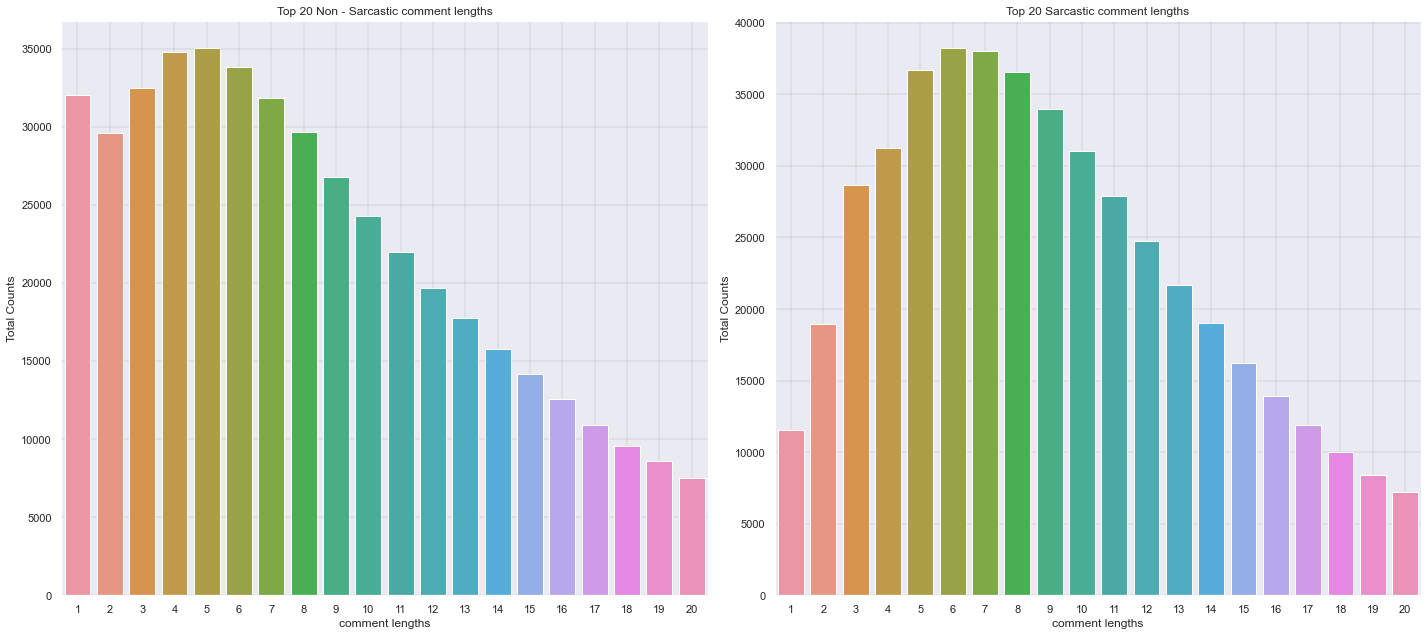

In [ ]:
plot(df_1        = comment_wordlength_ns, 
     df_2        = comment_wordlength_s, 
     column_name = 'comment lengths', 
     x_label     = 'comment lengths', 
     y_label     = 'Total Counts')

<pre>
Observations:
<pre>
In Non - Sarcastic comment, the comments with length 4 and 5 appears nearly 35,000 times.
In Sarcastic comment, the comments with length 6 and 7 appears more than 35,000 times.

<pre><font color = 'blue'><b>Top 20 "parent_comment" lengths</b><font>

In [ ]:
''' Top 20 parent_comment lengths ''' 

columns_titles = ['c_1','c_2']

df['words'] = df['parent_comment'].str.split().apply(len)

non_sarcasm = df[df['label'] == 0]['words']
parent_comment_wordlength_ns = pd.DataFrame(non_sarcasm.value_counts()[:20]).reset_index().rename({'index':'c_1', 'words' : 'c_2'}, axis = 'columns')

sarcasm = df[df['label'] == 1]['words']
parent_comment_wordlength_s = pd.DataFrame(sarcasm.value_counts()[:20]).reset_index().rename({'index':'c_1', 'words' : 'c_2'}, axis = 'columns')

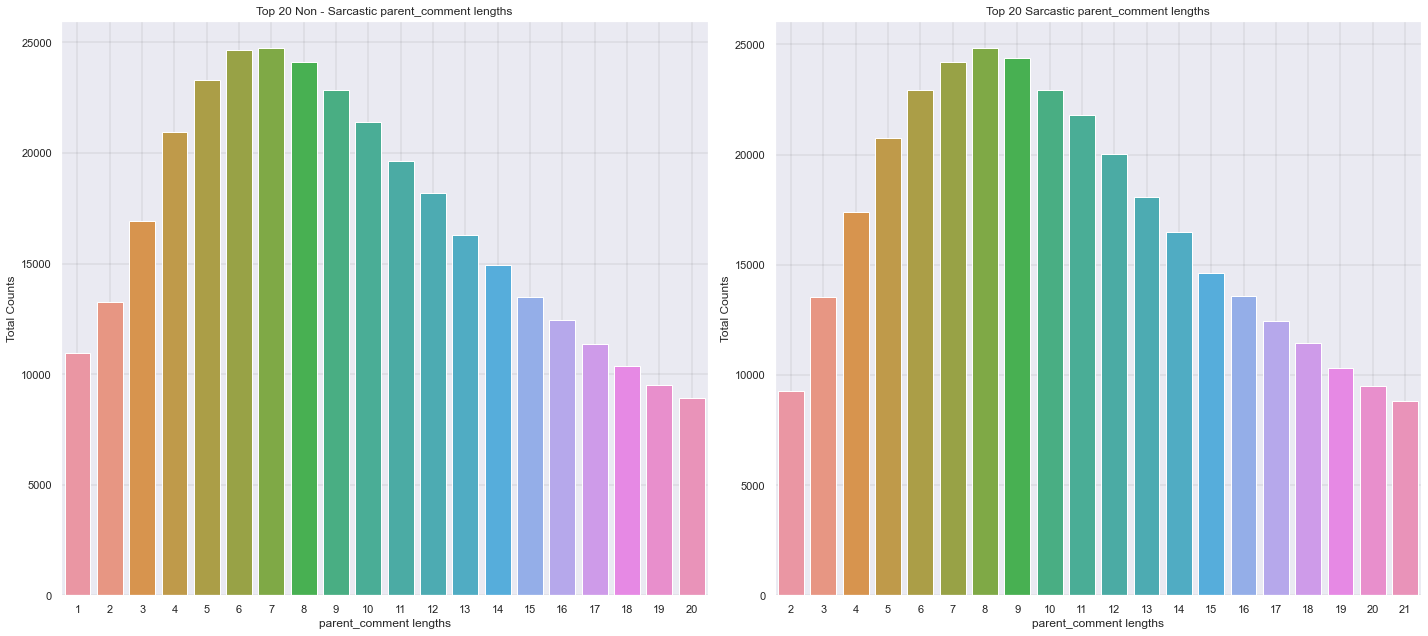

In [ ]:
plot(df_1        = parent_comment_wordlength_ns, 
     df_2        = parent_comment_wordlength_s, 
     column_name = 'parent_comment lengths', 
     x_label     = 'parent_comment lengths', 
     y_label     = 'Total Counts')

<pre>
Observations:
<pre>
In Non - Sarcastic comment, the parent_comment with length 6, 7 and 8 appears nearly 25,000 times.
In Sarcastic comment, the parent_comment with length 7, 8 and 9 appears more than 25,000 times.

<pre><font color = 'blue'><b>Top 20 "subreddit"</b><font>

In [ ]:
''' Top 20 subreddits ''' 

columns_titles = ['c_1','c_2']

non_sarcasm = df[df['label'] == 0]['subreddit']
subreddits_ns = pd.DataFrame(non_sarcasm.value_counts()[:20]).reset_index().rename({'index':'c_2', 'subreddit' : 'c_1'}, axis = 'columns').reindex(columns = columns_titles)

sarcasm = df[df['label'] == 1]['subreddit']
subreddits_s = pd.DataFrame(sarcasm.value_counts()[:20]).reset_index().rename({'index':'c_2', 'subreddit' : 'c_1'}, axis = 'columns').reindex(columns = columns_titles)

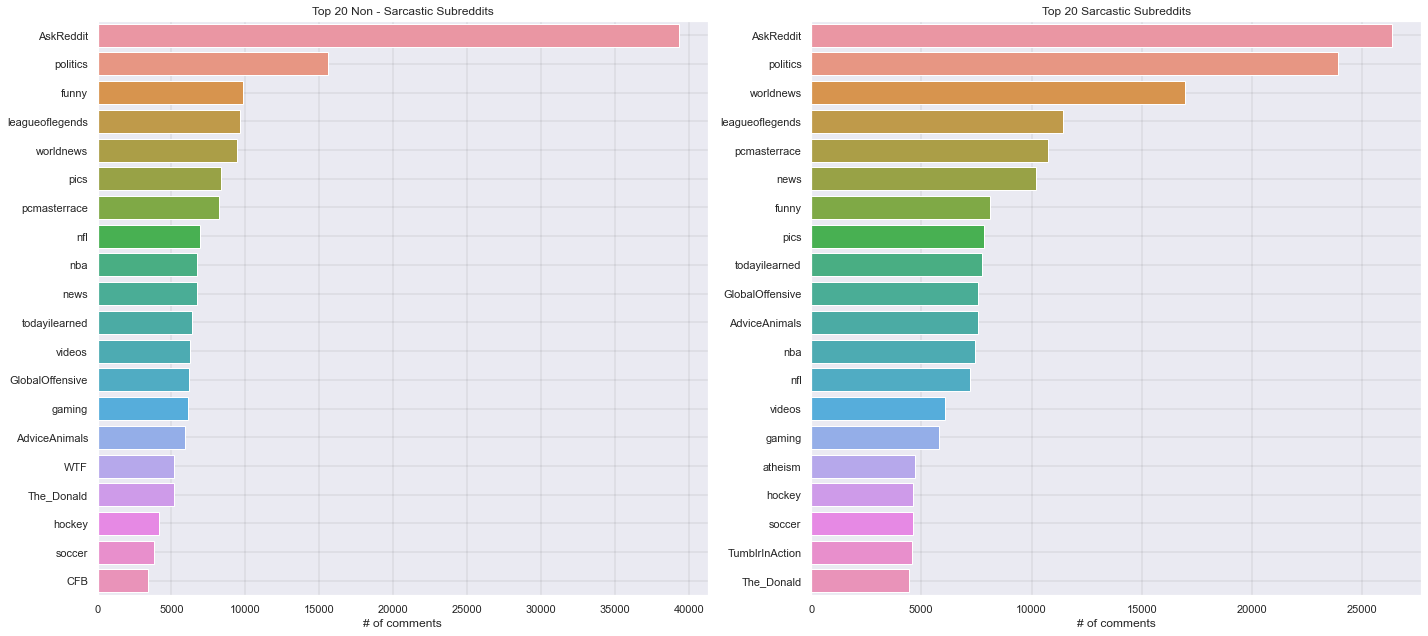

In [ ]:
plot(df_1        = subreddits_ns, 
     df_2        = subreddits_s, 
     column_name = 'Subreddits', 
     x_label     = '# of comments', 
     y_label     = '')

<pre>
Observations:
<pre>
In Non - Sarcastic subreddit, 'AskReddit' subreddit appears nearly 40,000 times which is by far maximum among others.
In Sarcastic subreddit, 'AskReddit' and 'politics' subreddits appears around 25,000 times which is by far maximum among others.

<pre><font color = 'blue'><b>Top 20 "author"</b><font>

In [ ]:
''' Top 20 authors ''' 

columns_titles = ['c_1','c_2']

non_sarcasm = df[df['label'] == 0]['author']
authors_ns = pd.DataFrame(non_sarcasm.value_counts()[:20]).reset_index().rename({'index':'c_2', 'author' : 'c_1'}, axis = 'columns').reindex(columns = columns_titles)

sarcasm = df[df['label'] == 1]['author']
authors_s = pd.DataFrame(sarcasm.value_counts()[:20]).reset_index().rename({'index':'c_2', 'author' : 'c_1'}, axis = 'columns').reindex(columns = columns_titles)

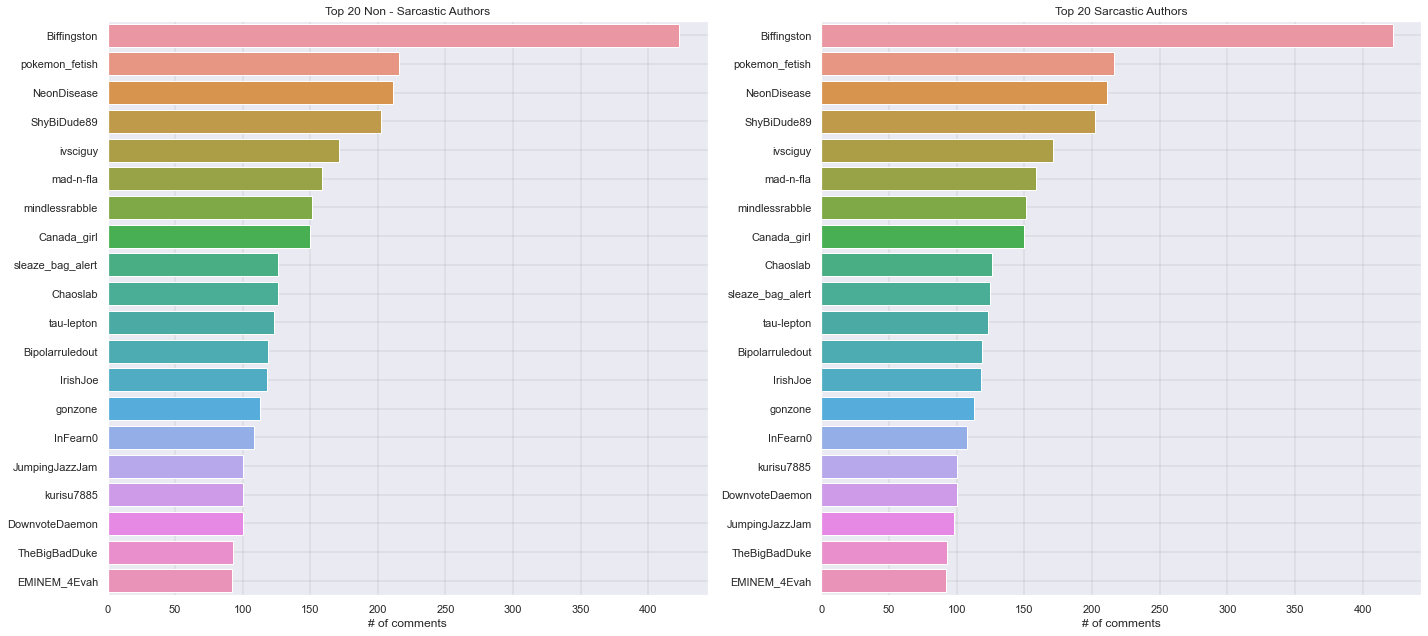

In [ ]:
plot(df_1        = authors_ns, 
     df_2        = authors_s, 
     column_name = 'Authors', 
     x_label     = '# of comments', 
     y_label     = '')

<pre>
Observations:
<pre>
In Non - Sarcastic author, 'Biffingston' posted more than 400 comments which is by far maximum among others.
In Sarcastic author, 'Biffingston' posted more than 400 comments which is by far maximum among others.

<pre><font color = 'red'><b>In this EDA we try to figure out whether the users of Reddit tend to be more sarcastic or not based on hrs, days, months and years.</b><font>

In [ ]:
def plot(x, title, x_label, y_label): 

    #
    figure, axes = plt.subplots(1, 2, figsize = (20, 7))

    # plot 1
    sns.countplot(x    = x,  
                  data = df.loc[df['label'] == 1], 
                  ax   = axes[0])

    axes[0].set(title  = 'Count of Sarcastic label per ' + title, 
                xlabel = x_label, 
                ylabel = y_label)

    axes[0].grid(color     = 'black', 
                 linewidth = 0.1)

    total = float(len(df))
    for p in axes[0].patches:
        height = p.get_height()
        axes[0].text(p.get_x() + p.get_width() / 2.,
                     height + 7,
                     '{:1.1f}%'.format((height / total) * 100 * 2),
                     ha = "center")

    # plot 2
    sns.countplot(x    = x,  
                  data = df.loc[df['label'] == 0], 
                  ax   = axes[1])

    axes[1].set(title  = 'Count of Non - Sarcastic label per ' + title, 
                xlabel = x_label, 
                ylabel = y_label)

    axes[1].grid(color     = 'black', 
                 linewidth = 0.1)

    total = float(len(df))
    for p in axes[1].patches:
        height = p.get_height()
        axes[1].text(p.get_x() + p.get_width() / 2.,
                     height + 7,
                     '{:1.1f}%'.format((height / total) * 100 * 2),
                     ha = "center")

    plt.tight_layout() # to avoid overlap
    plt.show()  

    return

<pre><font color = 'blue'><b>Hours (24 hrs format)</b><font>

In [ ]:
df['created_utc'] = pd.to_datetime(df['created_utc'])
df['hour'] = df['created_utc'].dt.hour.sort_index()

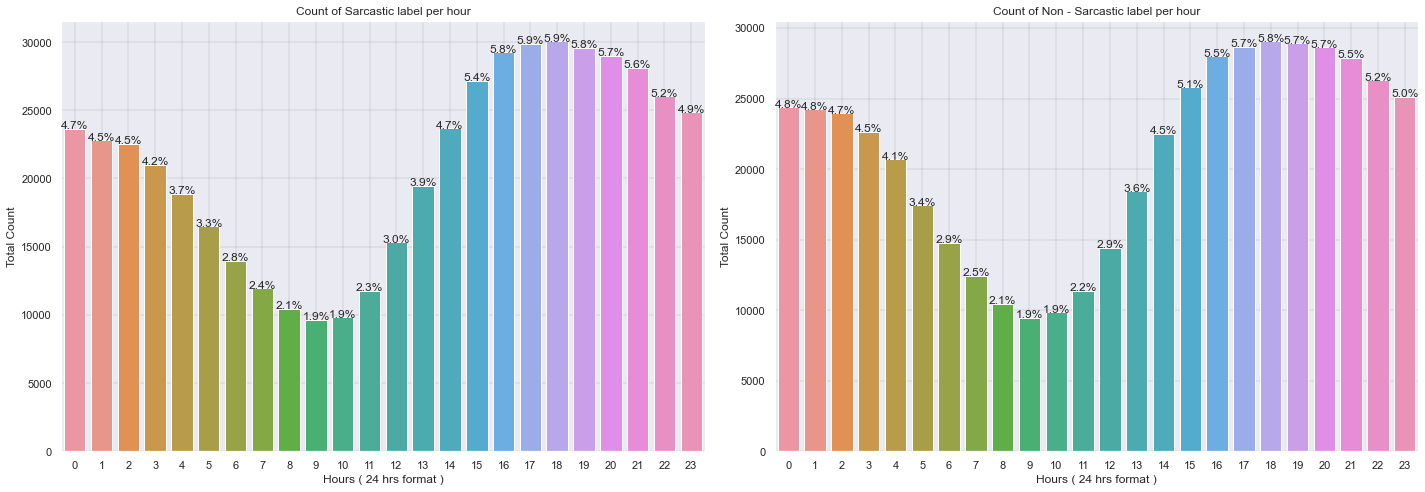

In [ ]:
plot(x       = 'hour', 
     title   = 'hour', 
     x_label = 'Hours ( 24 hrs format )', 
     y_label = 'Total Count')

<pre>
Observations:
<pre>
From the above plot 1 and 2, the count of Non-Sarcastic and Sarcastic comments 
decreases during the day time(from 6:00 to 12:00) as the reason for this issue could be due to working time for the users
and increases at the evening time (from 16:00 to 21:00) due to the rest time for the users.

<pre><font color = 'blue'><b>Days (Sun, Mon, Tue, Wed, Thurs, Fri, Sat)</b><font>

In [ ]:
df['created_utc'] = pd.to_datetime(df['created_utc'])
df['day'] = df['created_utc'].dt.day_name()

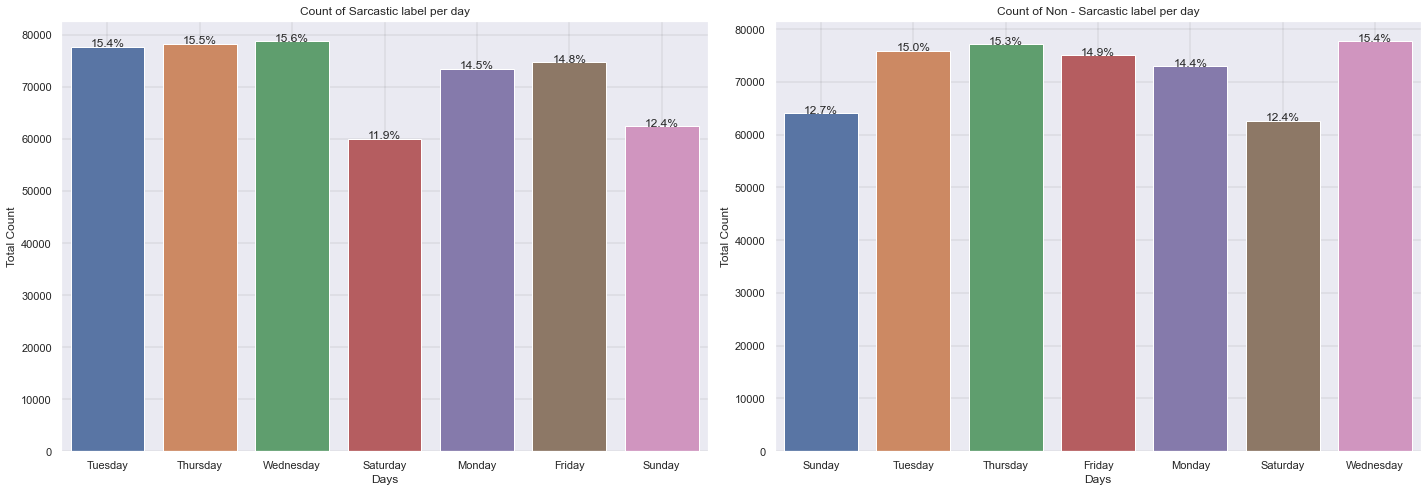

In [ ]:
plot(x       = 'day', 
     title   = 'day', 
     x_label = 'Days', 
     y_label = 'Total Count')

<pre>
Observations:
<pre>
From the above plot, the count of Non-Sarcastic and Sarcastic comments decreases during the weekends. 
One of the reason for this issue occurs as the users might spend their time personally rather than being active in the weekends.

<pre><font color = 'blue'><b>Months (January to December)</b><font>

In [ ]:
df['created_utc'] = pd.to_datetime(df['created_utc'])
df['month'] = df['created_utc'].dt.month_name()

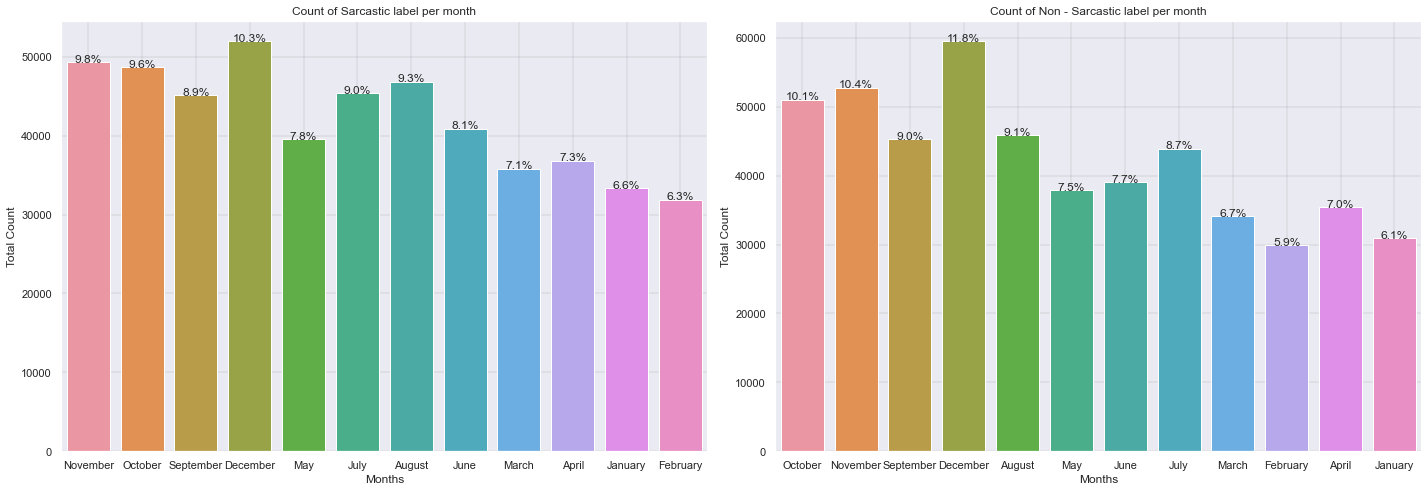

In [ ]:
plot(x       = 'month', 
     title   = 'month', 
     x_label = 'Months', 
     y_label = 'Total Count')

<pre>
Observations:
<pre>
From the above plots, the count of Non-Sarcastic and Sarcastic comments decreases during the first quarter of the year(January to April) and increases during the last quarter of the year(September to December).

<pre><font color = 'blue'><b>Years (2009 to 2016)</b><font>

In [ ]:
df['created_utc'] = pd.to_datetime(df['created_utc'])
df['year'] = df['created_utc'].dt.year.sort_index()

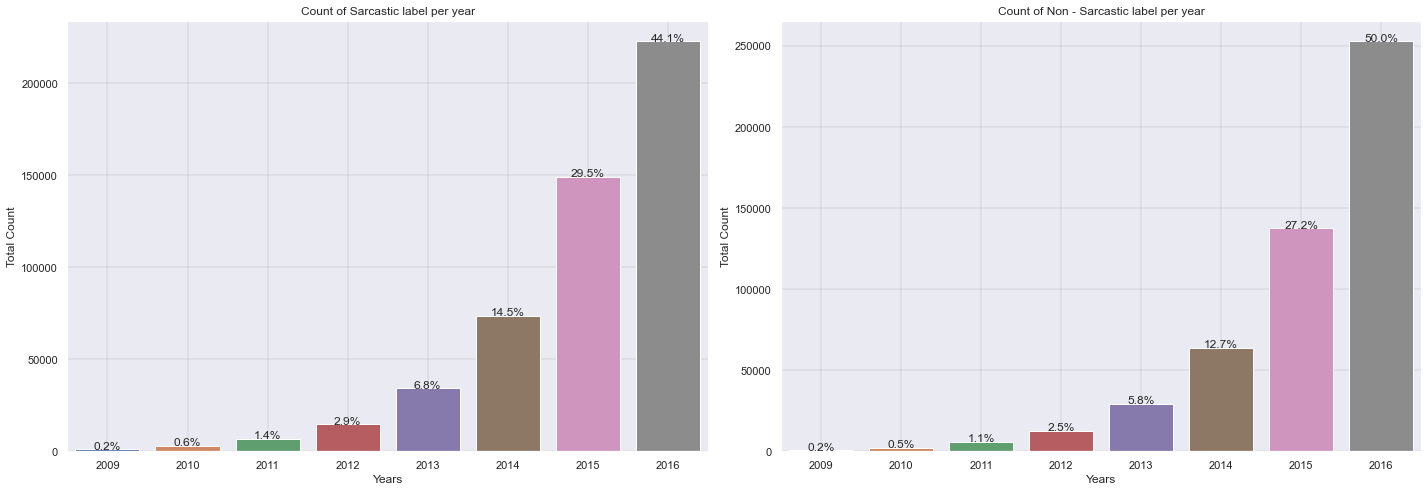

In [ ]:
plot(x       = 'year', 
     title   = 'year', 
     x_label = 'Years', 
     y_label = 'Total Count')

<pre>
Observations:
<pre>
From the above plots, the count of Non-Sarcastic and Sarcastic comments increases exponentially through the years.
This is because of the increased popularity of the Reddit through the years.

<pre><font color = 'red'><b>To check whether the Non-Sarcastic and Sarcastic label changes over time</b><font>

In [ ]:
import plotly.graph_objs as go

# Define dataframe for sarcastic and non-sarcastic label
non_sarcastic = df[df['label'] == 0]
sarcastic     = df[df['label'] == 1]

# Group the data by dates for non-sarcastic label
non_sarcastic = non_sarcastic.groupby(['date'])['label'].count()
non_sarcastic = pd.DataFrame(non_sarcastic)

# Group the data by dates for sarcastic label
sarcastic = sarcastic.groupby(['date'])['label'].count()
sarcastic = pd.DataFrame(sarcastic)

# Plotting the time series graph
fig = go.Figure()

fig.add_trace(go.Scatter(x       = non_sarcastic.index,
                         y       = non_sarcastic['label'],
                         name    = 'Non-Sarcastic',
                         line    = dict(color = 'blue'),
                         opacity = 0.8))

fig.add_trace(go.Scatter(x       = sarcastic.index,
                         y       = sarcastic['label'],
                         name    = 'Sarcastic',
                         line    = dict(color = 'red'),
                         opacity = 0.8))

fig.update_xaxes(rangeslider_visible = True,
                 rangeselector = dict(buttons = list([dict(count = 1, label = '1_Day', step = 'day', stepmode = 'backward'),
                                                      dict(count = 7, label = '1_Week', step = 'day', stepmode = 'backward'),
                                                      dict(count = 1, label = '1_Month', step = 'month', stepmode = 'backward'),
                                                      dict(count = 6, label = '6_Months', step = 'month', stepmode = 'backward'),
                                                      dict(count = 1, label = '1_Year', step = 'year', stepmode = 'backward'),
                                                      dict(step = 'all')])))
            
fig.update_layout(title_text   = 'Sarcastic and Non-Sarcastic label based on time', 
                  plot_bgcolor = 'rgb(248, 248, 255)',
                  yaxis_title  = 'Value')

fig.show()

<pre>
Observations:
<pre>
From the above graph we can conclude that, 
After 2016, the data of Non - Sarcastic comments seems to more than the Sarcastic comments.
Let's see how much they gets differed.

<pre><font color = 'red'><b>Outlier removal</b><font>

<pre>
As the "ups" feature consist some negative samples (i.e., -507, -1) 
This could be considered as outlier point as "ups" feature should only consist positive number.
So we are removing those negative points.

In [ ]:
df_new = df[df['ups'] >= 0]
df_new

,id,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment,words,hour,day,month,year
2,3,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.,4,21,Thursday,September,2016
5,6,0,"I don't pay attention to her, but as long as s...",only7inches,AskReddit,0,0,0,2016-09,2016-09-02 10:35:08,do you find ariana grande sexy ?,7,10,Friday,September,2016
10,11,0,I think a significant amount would be against ...,ThisIsNotKimJongUn,politics,92,92,0,2016-09,2016-09-20 17:53:52,I bet if that money was poured into college de...,23,17,Tuesday,September,2016
14,15,0,"Ayy bb wassup, it makes a bit more sense in co...",Jakethejoker,NYGiants,29,29,0,2016-09,2016-09-19 18:46:58,Ill give you a hint. They commented in this th...,10,18,Monday,September,2016
18,19,0,"why you fail me, my precious?",kozmo1313,HillaryForPrison,1,1,0,2016-09,2016-09-18 13:02:45,"Clinton struggles to gain traction in Florida,...",16,13,Sunday,September,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010821,1010741,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,...",29,0,Saturday,April,2009
1010822,1010742,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...,26,22,Thursday,May,2009
1010823,1010743,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...,10,0,Sunday,January,2009
1010824,1010744,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...,40,21,Friday,January,2009


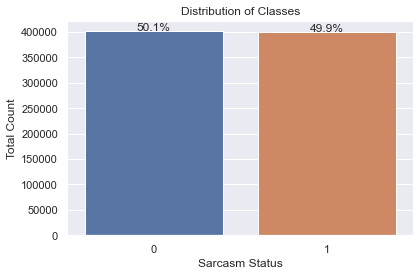

In [ ]:
'''To check whether the class_label is balanced or not '''

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme()

#
axes = sns.countplot(data = df_new, 
                     x    = 'label')

axes.set(title  = 'Distribution of Classes', 
         xlabel = 'Sarcasm Status', 
         ylabel = 'Total Count')

#
total = float(len(df_new))
for p in axes.patches:
    height = p.get_height()
    axes.text(p.get_x() + p.get_width() / 2.,
              height + 3,
              '{:1.1f}%'.format((height / total) * 100),
              ha = "center") 
              
plt.tight_layout()
plt.show()

<pre>
Here I am sorting the dataset by created_utc, as some topics which are considered non-sarcastic today might be considered sarcastic later.

In [ ]:
# sort by created date 
df_new.sort_values(by = 'created_utc', inplace = True)
df_new.reset_index(drop = True, inplace = True)
df_new

,label,comment,author,subreddit,score,ups,downs,created_utc,parent_comment
0,0,Rhetorical rheddit,veritaze,Marijuana,4,4,0,2009-01-01 23:08:43,Why does the US Government support the use of ...
1,0,I was dreaming that I was a Snuffleupagus!,SleepingSheeple,WTF,3,3,0,2009-01-01 23:50:50,And how much taxpayer money went into the Cook...
2,1,Obviously the most well-informed and unbiased ...,Tucci,reddit.com,0,0,0,2009-01-02 07:03:22,"FTA: Ephraim Sneh, a former member of the Isra..."
3,1,Yes..wikipedia will teach it to you.,Kelevra,worldnews,7,7,0,2009-01-02 07:28:56,Some redditors need to read the History of the...
4,0,Cheese.,McCourt,Art,2,2,0,2009-01-02 15:28:00,Abstract beauty
...,...,...,...,...,...,...,...,...,...
801582,1,Apparently it does because the USA is of the bad,oblivionrecurs,worldnews,2,2,0,2016-09-30 23:56:24,I'm not really understanding how mass incarcer...
801583,1,At least he looked cool going out.,Whois-PhilissSS,watchpeopledie,4,4,0,2016-09-30 23:56:54,Motorcyclist Doing Wheelie Dies
801584,1,It's almost as if new things are new and peopl...,Raknak,Competitiveoverwatch,1,1,0,2016-09-30 23:56:58,"Happens a lot, most people have no idea what t..."
801585,0,"Because he's racist, only reason to do that.",iMex330,news,4,4,0,2016-09-30 23:57:15,So black pride gets capitalized but White Prid...


In [ ]:
# dropping unwanted columns
df_new = df_new.drop(['author', 'subreddit', 'created_utc'], axis = 1)

In [ ]:
df_new

,label,comment,score,ups,downs,parent_comment
0,0,Rhetorical rheddit,4,4,0,Why does the US Government support the use of ...
1,0,I was dreaming that I was a Snuffleupagus!,3,3,0,And how much taxpayer money went into the Cook...
2,1,Obviously the most well-informed and unbiased ...,0,0,0,"FTA: Ephraim Sneh, a former member of the Isra..."
3,1,Yes..wikipedia will teach it to you.,7,7,0,Some redditors need to read the History of the...
4,0,Cheese.,2,2,0,Abstract beauty
...,...,...,...,...,...,...
801582,1,Apparently it does because the USA is of the bad,2,2,0,I'm not really understanding how mass incarcer...
801583,1,At least he looked cool going out.,4,4,0,Motorcyclist Doing Wheelie Dies
801584,1,It's almost as if new things are new and peopl...,1,1,0,"Happens a lot, most people have no idea what t..."
801585,0,"Because he's racist, only reason to do that.",4,4,0,So black pride gets capitalized but White Prid...


In [ ]:
'''train_test_split'''

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df_new, 
                                                  df_new['label'], 
                                                  test_size    = 0.30, 
                                                  random_state = 42, 
                                                  stratify     = df_new['label'])

X_val, X_test, y_val, y_test = train_test_split(X_val, 
                                                y_val, 
                                                test_size    = 0.50, 
                                                random_state = 42, 
                                                stratify     = y_val)

print('X_train :', X_train.shape)
print('X_val   :', X_val.shape)
print('X_test  :', X_test.shape)

X_train : (561110, 6)
X_val   : (120238, 6)
X_test  : (120239, 6)


In [ ]:
X_train.to_parquet('train.parquet')

In [ ]:
X_val.to_parquet('val.parquet')

In [ ]:
X_test.to_parquet('test.parquet')

<pre><font color = 'red'><h2><b>Pre processing</b><font>

In [ ]:
import re
import nltk
import contractions
from nltk.corpus import stopwords

# Removing URL links (e.g., "Checkout www.reddit.com" ---> "Checkout")
def remove_URLLinks(text):
    text = re.sub(r'https?://\S+|www\.\S+', '', text, flags = re.MULTILINE)
    return text

# Removing HTML tags (e.g., "<p>AutoML</p>" ---> "AutoML")
def remove_HTMLTags(text):
    text = re.sub(r'<.*?>', '', text, flags = re.MULTILINE)
    return text

# Converting a word to lower case (e.g., "NLP" ---> "nlp")
def convert_ToLowerCase(text):
    return text.lower()

# Removing new line (e.g., "\nThis\nisn't\nfunny" ---> "This isn't funny")
def remove_NewLine(text):
    return re.sub(r'\n', ' ', text)

# Removing words with numbers (e.g., "king123" ---> "king")
def remove_WordsWithNumbers(text):
    return re.sub(r'\S*\d\S*', '', text).strip()

# Removing punctuations (e.g., "green!" ---> "green")
def remove_Puctuations(text):
    return re.sub(r'[^a-zA-Z\d\s]', '', text)

# Expanding contractions (e.g., "don’t" ---> "do not")
def expand_Contractions(text):
    output = []
    for i in text.split(' '):
        output.append(contractions.fix(i))

    return ' '.join(output)

# Stopwords removal
stop_words = set(stopwords.words('english'))
modified_stop_words = list(stop_words)
    
def remove_stopwords(text):
    
    text = text.split()
    
    clean_list = []
    
    for word in text:
        
        if word in set(modified_stop_words):
            pass
        
        else:
            clean_list.append(word)
        
    return " ".join(clean_list)

# Removing white spaces (e.g., "  Own country" ---> "Own country")
def remove_WhiteSpaces(text):
    return text.strip()

# Removing spaces more than one (e.g., "North   Korea" ---> "North Korea")
def remove_SpacesMoreThanOne(text):
    return re.sub('[ ]{2,}', ' ', text).strip()

<pre><font color = 'blue'><b>Pre processing with stopwords</b><font>

<pre>
Creating two features "pre_comment" & "pre_parent_comment" which is preprocessed with stopwords.

In [ ]:
def pre_process(data):
    
    data = str(data)

    data = remove_URLLinks(text = data)
    data = remove_HTMLTags(text = data)
    data = convert_ToLowerCase(text = data)
    data = remove_NewLine(text = data)
    data = remove_WordsWithNumbers(text = data)
    data = expand_Contractions(text = data)
    data = remove_Puctuations(text = data)
    data = remove_WhiteSpaces(text = data)
    data = remove_SpacesMoreThanOne(text = data)
    
    return data

In [ ]:
from tqdm import tqdm
tqdm.pandas()

In [ ]:
# comment
df_new['pre_comment'] = df_new.progress_apply(lambda x : pre_process(data = x['comment']), axis = 1)

100%|██████████| 801587/801587 [00:50<00:00, 15844.78it/s]


In [ ]:
# parent_comment
df_new['pre_parent_comment'] = df_new.progress_apply(lambda x : pre_process(data = x['parent_comment']), axis = 1)

100%|██████████| 801587/801587 [01:36<00:00, 8274.19it/s] 


<pre>
<font color = 'blue'><b>Pre processing without stopwords</b><font>

<pre>
Creating two features "pre_stop_comment" & "pre_stop_parent_comment" which is preprocessed without stopwords.

In [ ]:
def pre_process_stop(data):
    
    data = str(data)

    data = remove_URLLinks(text = data)
    data = remove_HTMLTags(text = data)
    data = convert_ToLowerCase(text = data)
    data = remove_NewLine(text = data)
    data = remove_WordsWithNumbers(text = data)
    data = expand_Contractions(text = data)
    data = remove_stopwords(text = data)
    data = remove_Puctuations(text = data)
    data = remove_WhiteSpaces(text = data)
    data = remove_SpacesMoreThanOne(text = data)
    
    return data

In [ ]:
# comment
df_new['pre_stop_comment'] = df_new.progress_apply(lambda x : pre_process_stop(data = x['comment']), axis = 1)

100%|██████████| 801587/801587 [01:21<00:00, 9878.40it/s] 


In [ ]:
# parent_comment
df_new['pre_stop_parent_comment'] = df_new.progress_apply(lambda x : pre_process_stop(data = x['parent_comment']), axis = 1)

100%|██████████| 801587/801587 [02:47<00:00, 4794.48it/s]


In [ ]:
df_new.head()

,label,comment,score,ups,downs,parent_comment,pre_comment,pre_parent_comment,pre_stop_comment,pre_stop_parent_comment
0,0,Rhetorical rheddit,4,4,0,Why does the US Government support the use of ...,rhetorical rheddit,why does the us government support the use of ...,rhetorical rheddit,us government support use synthetic thc varian...
1,0,I was dreaming that I was a Snuffleupagus!,3,3,0,And how much taxpayer money went into the Cook...,i was dreaming that i was a snuffleupagus,and how much taxpayer money went into the cook...,dreaming snuffleupagus,much taxpayer money went cookie monster embigg...
2,1,Obviously the most well-informed and unbiased ...,0,0,0,"FTA: Ephraim Sneh, a former member of the Isra...",obviously the most wellinformed and unbiased i...,fta ephraim sneh a former member of the israel...,obviously wellinformed unbiased individual sta...,fta ephraim sneh former member israeli cabinet...
3,1,Yes..wikipedia will teach it to you.,7,7,0,Some redditors need to read the History of the...,yeswikipedia will teach it to you,some redditors need to read the history of the...,yeswikipedia teach you,redditors need read history israelipalestinian...
4,0,Cheese.,2,2,0,Abstract beauty,cheese,abstract beauty,cheese,abstract beauty


: 

<pre><font color = 'red'><h2><b>Feature extraction</b><font>

<pre>
Creating advanced Features

<pre>
<font color = 'blue'><b>1. Character counter</b><font>
<pre>
Increments the counter if we encounter any character in each string.

In [ ]:
# comment
df_new['c_char']  = df_new['comment'].str.len()

In [ ]:
# parent_comment
df_new['pc_char'] = df_new['parent_comment'].str.len()

In [ ]:
df_new.head()

,label,comment,score,ups,downs,parent_comment,pre_comment,pre_parent_comment,pre_stop_comment,pre_stop_parent_comment,c_char,pc_char
0,0,Rhetorical rheddit,4,4,0,Why does the US Government support the use of ...,rhetorical rheddit,why does the us government support the use of ...,rhetorical rheddit,us government support use synthetic thc varian...,18,161
1,0,I was dreaming that I was a Snuffleupagus!,3,3,0,And how much taxpayer money went into the Cook...,i was dreaming that i was a snuffleupagus,and how much taxpayer money went into the cook...,dreaming snuffleupagus,much taxpayer money went cookie monster embigg...,42,95
2,1,Obviously the most well-informed and unbiased ...,0,0,0,"FTA: Ephraim Sneh, a former member of the Isra...",obviously the most wellinformed and unbiased i...,fta ephraim sneh a former member of the israel...,obviously wellinformed unbiased individual sta...,fta ephraim sneh former member israeli cabinet...,90,166
3,1,Yes..wikipedia will teach it to you.,7,7,0,Some redditors need to read the History of the...,yeswikipedia will teach it to you,some redditors need to read the history of the...,yeswikipedia teach you,redditors need read history israelipalestinian...,36,108
4,0,Cheese.,2,2,0,Abstract beauty,cheese,abstract beauty,cheese,abstract beauty,7,15


<pre>
<font color = 'blue'><b>2. Punctuation counter</b><font>
<pre>
Increments the counter if we encounter any punctuation in each string.

In [ ]:
# comment
df_new['c_punct'] = df_new['comment'].str.findall(r'[^a-zA-Z\d\s]').str.len()

In [ ]:
# parent_comment
df_new['pc_punct'] = df_new['parent_comment'].str.findall(r'[^a-zA-Z\d\s]').str.len()

In [ ]:
df_new.head()

,label,comment,score,ups,downs,parent_comment,pre_comment,pre_parent_comment,pre_stop_comment,pre_stop_parent_comment,c_char,pc_char,c_punct,pc_punct
0,0,Rhetorical rheddit,4,4,0,Why does the US Government support the use of ...,rhetorical rheddit,why does the us government support the use of ...,rhetorical rheddit,us government support use synthetic thc varian...,18,161,0,2
1,0,I was dreaming that I was a Snuffleupagus!,3,3,0,And how much taxpayer money went into the Cook...,i was dreaming that i was a snuffleupagus,and how much taxpayer money went into the cook...,dreaming snuffleupagus,much taxpayer money went cookie monster embigg...,42,95,1,3
2,1,Obviously the most well-informed and unbiased ...,0,0,0,"FTA: Ephraim Sneh, a former member of the Isra...",obviously the most wellinformed and unbiased i...,fta ephraim sneh a former member of the israel...,obviously wellinformed unbiased individual sta...,fta ephraim sneh former member israeli cabinet...,90,166,2,4
3,1,Yes..wikipedia will teach it to you.,7,7,0,Some redditors need to read the History of the...,yeswikipedia will teach it to you,some redditors need to read the history of the...,yeswikipedia teach you,redditors need read history israelipalestinian...,36,108,3,3
4,0,Cheese.,2,2,0,Abstract beauty,cheese,abstract beauty,cheese,abstract beauty,7,15,1,0


<pre>
<font color = 'blue'><b>3. Token counter</b><font>
<pre>
Increments the counter if we encounter any tokens in each string.

In [ ]:
# comment
df_new['c_tokens'] = df_new['comment'].str.split().str.len()

In [ ]:
# parent_comment
df_new['pc_tokens'] = df_new['parent_comment'].str.split().str.len()

In [ ]:
df_new.head()

,label,comment,score,ups,downs,parent_comment,pre_comment,pre_parent_comment,pre_stop_comment,pre_stop_parent_comment,c_char,pc_char,c_punct,pc_punct,c_tokens,pc_tokens
0,0,Rhetorical rheddit,4,4,0,Why does the US Government support the use of ...,rhetorical rheddit,why does the us government support the use of ...,rhetorical rheddit,us government support use synthetic thc varian...,18,161,0,2,2,31
1,0,I was dreaming that I was a Snuffleupagus!,3,3,0,And how much taxpayer money went into the Cook...,i was dreaming that i was a snuffleupagus,and how much taxpayer money went into the cook...,dreaming snuffleupagus,much taxpayer money went cookie monster embigg...,42,95,1,3,8,15
2,1,Obviously the most well-informed and unbiased ...,0,0,0,"FTA: Ephraim Sneh, a former member of the Isra...",obviously the most wellinformed and unbiased i...,fta ephraim sneh a former member of the israel...,obviously wellinformed unbiased individual sta...,fta ephraim sneh former member israeli cabinet...,90,166,2,4,14,30
3,1,Yes..wikipedia will teach it to you.,7,7,0,Some redditors need to read the History of the...,yeswikipedia will teach it to you,some redditors need to read the history of the...,yeswikipedia teach you,redditors need read history israelipalestinian...,36,108,3,3,6,16
4,0,Cheese.,2,2,0,Abstract beauty,cheese,abstract beauty,cheese,abstract beauty,7,15,1,0,1,2


<pre>
<font color = 'blue'><b>3. Sentiment analysis : polarity and subjectivity.</b><font>
<pre>
3.1. Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.
3.2. Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

In [ ]:
from textblob import TextBlob

In [ ]:
# comment
df_new[['c_polarity', 'c_subjectivity']] = df_new['comment'].progress_apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

100%|█████████████████████████████████| 801587/801587 [03:29<00:00, 3820.69it/s]


In [ ]:
# parent_comment
df_new[['pc_polarity', 'pc_subjectivity']] = df_new['parent_comment'].progress_apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

100%|█████████████████████████████████| 801587/801587 [04:24<00:00, 3028.06it/s]


In [ ]:
df_new.head()

,label,comment,score,ups,downs,parent_comment,pre_comment,pre_parent_comment,pre_stop_comment,pre_stop_parent_comment,c_char,pc_char,c_punct,pc_punct,c_tokens,pc_tokens,c_polarity,c_subjectivity,pc_polarity,pc_subjectivity
0,0,Rhetorical rheddit,4,4,0,Why does the US Government support the use of ...,rhetorical rheddit,why does the us government support the use of ...,rhetorical rheddit,us government support use synthetic thc varian...,18,161,0,2,2,31,0.000000,0.000000,0.100000,0.400000
1,0,I was dreaming that I was a Snuffleupagus!,3,3,0,And how much taxpayer money went into the Cook...,i was dreaming that i was a snuffleupagus,and how much taxpayer money went into the cook...,dreaming snuffleupagus,much taxpayer money went cookie monster embigg...,42,95,1,3,8,15,0.000000,0.000000,0.250000,0.200000
2,1,Obviously the most well-informed and unbiased ...,0,0,0,"FTA: Ephraim Sneh, a former member of the Isra...",obviously the most wellinformed and unbiased i...,fta ephraim sneh a former member of the israel...,obviously wellinformed unbiased individual sta...,fta ephraim sneh former member israeli cabinet...,90,166,2,4,14,30,0.166667,0.466667,0.216667,0.366667
3,1,Yes..wikipedia will teach it to you.,7,7,0,Some redditors need to read the History of the...,yeswikipedia will teach it to you,some redditors need to read the history of the...,yeswikipedia teach you,redditors need read history israelipalestinian...,36,108,3,3,6,16,0.000000,0.000000,0.000000,0.000000
4,0,Cheese.,2,2,0,Abstract beauty,cheese,abstract beauty,cheese,abstract beauty,7,15,1,0,1,2,0.000000,0.000000,0.000000,0.000000


In [ ]:
df_new.to_parquet('df_new.parquet')

<pre><font color = 'red'><h1><b>DL models</b><font>

<pre>
<font color = 'red'><b>Features used in this model :</b><font>
<pre>
pre_comment, pre_stop_comment, pre_stop_parent_comment, pre_parent_comment, score, ups and downs.

In [3]:
import pandas as pd

df = pd.read_parquet('df_new.parquet')
df.head()

,label,comment,score,ups,downs,parent_comment,pre_comment,pre_parent_comment,pre_stop_comment,pre_stop_parent_comment,c_char,pc_char,c_punct,pc_punct,c_tokens,pc_tokens,c_polarity,c_subjectivity,pc_polarity,pc_subjectivity
0,0,Rhetorical rheddit,4,4,0,Why does the US Government support the use of ...,rhetorical rheddit,why does the us government support the use of ...,rhetorical rheddit,us government support use synthetic thc varian...,18,161,0,2,2,31,0.000000,0.000000,0.100000,0.400000
1,0,I was dreaming that I was a Snuffleupagus!,3,3,0,And how much taxpayer money went into the Cook...,i was dreaming that i was a snuffleupagus,and how much taxpayer money went into the cook...,dreaming snuffleupagus,much taxpayer money went cookie monster embigg...,42,95,1,3,8,15,0.000000,0.000000,0.250000,0.200000
2,1,Obviously the most well-informed and unbiased ...,0,0,0,"FTA: Ephraim Sneh, a former member of the Isra...",obviously the most wellinformed and unbiased i...,fta ephraim sneh a former member of the israel...,obviously wellinformed unbiased individual sta...,fta ephraim sneh former member israeli cabinet...,90,166,2,4,14,30,0.166667,0.466667,0.216667,0.366667
3,1,Yes..wikipedia will teach it to you.,7,7,0,Some redditors need to read the History of the...,yeswikipedia will teach it to you,some redditors need to read the history of the...,yeswikipedia teach you,redditors need read history israelipalestinian...,36,108,3,3,6,16,0.000000,0.000000,0.000000,0.000000
4,0,Cheese.,2,2,0,Abstract beauty,cheese,abstract beauty,cheese,abstract beauty,7,15,1,0,1,2,0.000000,0.000000,0.000000,0.000000


In [4]:
'''train_test_split'''

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.drop('label', axis = 1), 
                                                  df['label'], 
                                                  test_size    = 0.30, 
                                                  random_state = 42, 
                                                  stratify     = df['label'])

X_val, X_test, y_val, y_test = train_test_split(X_val, 
                                                y_val, 
                                                test_size    = 0.50, 
                                                random_state = 42, 
                                                stratify     = y_val)

print('X_train :', X_train.shape)
print('X_val   :', X_val.shape)
print('X_test  :', X_test.shape)

X_train : (561110, 19)
X_val   : (120238, 19)
X_test  : (120239, 19)


<pre><font color = 'blue'><b>compute_class_weight</b><font>

In [5]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# compute_class_weight
class_weights = compute_class_weight(class_weight = 'balanced',
                                     classes      = np.unique(df['label']),
                                     y            = df['label'])

# class_weight_dict
class_weight_dict = dict(enumerate(class_weights))

print('Class_label_weights :')
print('\nSarcastic     :', class_weight_dict[1])
print('Non-Sarcastic :', class_weight_dict[0])

Class_label_weights :

Sarcastic     : 1.0019286439245843
Non-Sarcastic : 0.998078766824798


<pre>
<font color = 'blue'><b>Long Short Term Memory model</b><font>
<pre>
For "comment" feature,
LSTM layer  consisting of 100 units

For "parent_comment" feature,
LSTM layer  consisting of 100 units

For numerical features,
Dense layer 1 consisting of 256 units

Dropout of 0.2

In [6]:
def lstm_model(max_length_1, vocab_size_1, embedding_size_1, embedding_matrix_1, max_length_2, vocab_size_2, embedding_size_2, embedding_matrix_2):

    import tensorflow as tf
    tf.keras.backend.clear_session() # clear up memory / clear up any previous loaded graphs
    
    ################################################[comment_layer]################################################
    
    from tensorflow.keras.layers import Input, Embedding, LSTM, Flatten
    
    # define feature
    input_layer_1 = Input(shape = (max_length_1, ),
                          name  = 'comment')
    
    c_feature = Embedding(input_dim    = len(vocab_size_1) + 1,
                          output_dim   = embedding_size_1,
                          weights      = [embedding_matrix_1],
                          input_length = max_length_1,
                          trainable    = False)(input_layer_1)
    
    c_feature = LSTM(100)(c_feature)
    c_flatten = Flatten()(c_feature)
    
    ################################################[parent_comment_layer]########################################
    
    from tensorflow.keras.layers import Input, Embedding, LSTM, Flatten
    
    # define feature
    input_layer_2 = Input(shape = (max_length_2, ),
                          name  = 'parent_comment')
    
    pc_feature = Embedding(input_dim    = len(vocab_size_2) + 1,
                           output_dim   = embedding_size_2,
                           weights      = [embedding_matrix_2],
                           input_length = max_length_2,
                           trainable    = False)(input_layer_2)
    
    pc_feature = LSTM(100)(pc_feature)
    pc_flatten = Flatten()(pc_feature)
    
    ###############################################[numerical_layer]##############################################
    
    from tensorflow.keras.layers import Input, Dense
    
    #take score as input
    input_layer_3 = Input(shape = (1, ), name = 'score')
    score_dense = Dense(units = 256, activation = 'relu')(input_layer_3)
    
    #take ups as input
    input_layer_4 = Input(shape = (1, ), name = 'ups')
    ups_dense = Dense(units = 256, activation = 'relu')(input_layer_4)
    
    #take downs as input
    input_layer_5 = Input(shape = (1, ), name = 'downs')
    downs_dense = Dense(units = 256, activation = 'relu')(input_layer_5)
    
    ###############################################[concatenate]##################################################
    
    from tensorflow.keras.layers import concatenate
    
    from tensorflow.keras.layers import Dropout
    from tensorflow.keras.models import Model
    
    merge = concatenate([c_flatten, 
                         pc_flatten, 
                         score_dense, ups_dense, downs_dense])
    
    # dropout_layer
    dropout_layer = Dropout(0.2)(merge)
    
    dense_layer_1 = Dense(units      = 256, 
                          activation = 'relu', 
                          name       = 'fully_connected')(dropout_layer)
    
    dense_layer_2 = Dense(units      = 128, 
                          activation = 'relu')(dense_layer_1)
    
    output_layer  = Dense(units      = 1, 
                          activation = 'sigmoid')(dense_layer_2)
    # Model_1
    model = Model(inputs  = [input_layer_1, 
                             input_layer_2, 
                             input_layer_3, input_layer_4, input_layer_5],
                    outputs = output_layer)

    return model

<pre><font color = 'blue'><b>callbacks</b><font>

In [7]:
###############################################[EarlyStopping]##################################################

from tensorflow.keras.callbacks import EarlyStopping

# Stop training when a definite metric no longer improves.
Early_Stopping = EarlyStopping(patience             = 5,
                               monitor              = 'val_accuracy',
                               min_delta            = 0.001,
                               restore_best_weights = True)

###############################################[ReduceLROnPlateau]##############################################

from tensorflow.keras.callbacks import ReduceLROnPlateau

# When a specific metric stop improving, decrease the learning rate.
ReduceLR_On_Plateau = ReduceLROnPlateau(monitor  = 'val_accuracy', 
                                        factor   = 0.2,
                                        patience = 5, 
                                        min_lr   = 0.001)

###############################################[LearningRateScheduler]###########################################

from tensorflow.keras.callbacks import LearningRateScheduler

# The learning rate will be modified whenever a new epoch starts (based on a function).
def lr_time_based_decay(epoch, lr):

    epochs = 100
    initial_learning_rate = 0.01
    decay = initial_learning_rate / epochs

    #
    calculate = lr * 1 / (1 + decay * epoch)

    return calculate

Learning_Rate_Scheduler = LearningRateScheduler(lr_time_based_decay, verbose = 1)

#
callbacks_list = [Early_Stopping, ReduceLR_On_Plateau, Learning_Rate_Scheduler]

<pre><font color = 'blue'><b>function to calculate metrics (i.e., precision, recall and f1_score)</b><font>

In [8]:
from tensorflow.keras import backend as K

###############################################[precision]##############################################

def precision(y_true, y_pred):

    true_positives      = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision           = true_positives / (predicted_positives + K.epsilon())
   
    return precision

################################################[recall]###############################################

def recall(y_true, y_pred):

    true_positives     = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall             = true_positives / (possible_positives + K.epsilon())
   
    return recall

###############################################[f1_score]###############################################

def f1_score(y_true, y_pred):

    precision_ = precision(y_true, y_pred)
    recall_    = recall(y_true, y_pred)
    f1_score   = 2*((precision_ * recall_)/(precision_ + recall_ + K.epsilon()))

    return f1_score

<pre><font color = 'blue'><b>function to plot metircs (i,e., loss, accuracy, precision, recall and f1_score)</b><font>

In [23]:
import matplotlib.pyplot as plt 
import seaborn as sns

def plot_metric(model_name, history, metric):
    
    plt.figure(figsize = (7, 5))
    sns.set(font_scale = 1.5) 

    train_metrics = history.history[metric]
    val_metrics   = history.history['val_' + metric]
    epochs        = range(1, len(train_metrics) + 1)
    
    sns.lineplot(y      = train_metrics, 
                 x      = epochs,
                 marker = 'o',
                 label  = 'train_'+metric)

    sns.lineplot(y      = val_metrics, 
                 x      = epochs,
                 marker = 'o',
                 label  = 'val_'+metric)

    plt.legend()

    plt.ylabel(metric)
    plt.xlabel('epochs')
    plt.title(model_name + ' model - ' + metric + ' graph')
    plt.show()

<pre>
<font color = 'red'><h2><b>Model</b><font>

<pre>
Model : LSTM, Pre-trained Embedding : Fast Text, Pre-processing : with stopwords

<pre><font color = 'blue'><b>Fast Text</b><font>

In [12]:
# FastText link : https://www.kaggle.com/datasets/yekenot/fasttext-crawl-300d-2m

import numpy as np

#
ft_path = r'crawl-300d-2M.vec'

def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype = 'float32')

embeddings_index = dict(get_coefs( * o.rstrip().rsplit(' ')) for o in open(ft_path,'r',encoding = 'utf-8'))

print('Found %s word vectors.' % len(embeddings_index))

Found 2000000 word vectors.


<pre>
<font color = 'blue'><b>Text feature : pre_comment</b><font>

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# max_length
max_length_c = 40

# tokenizer
tokenizer_c = Tokenizer(num_words = 50000, oov_token = '<unk>')

# fit has to happen only on train data
tokenizer_c.fit_on_texts(X_train['pre_comment'].values)

# texts_to_sequences
X_train_c_sequences = tokenizer_c.texts_to_sequences(X_train['pre_comment'].values)
X_train_c_padding   = pad_sequences(X_train_c_sequences, maxlen = max_length_c)

X_val_c_sequences   = tokenizer_c.texts_to_sequences(X_val['pre_comment'].values)
X_val_c_padding     = pad_sequences(X_val_c_sequences, maxlen = max_length_c)

X_test_c_sequences  = tokenizer_c.texts_to_sequences(X_test['pre_comment'].values)
X_test_c_padding    = pad_sequences(X_test_c_sequences, maxlen = max_length_c)


# shape
print('After_padding :')
print('\nX_train : ', X_train_c_padding.shape)
print('X_val   : ', X_val_c_padding.shape)
print('X_test  : ', X_test_c_padding.shape)
print()
print('='* 110)

#
vocab_size_c = tokenizer_c.word_index
print('\nVocab_size "comment" :', len(vocab_size_c))

###############################################[embedding_matrix]###################################################

#
embedding_size_c = 300

# create a weight matrix for words in training docs
embedding_matrix_c = np.zeros((len(vocab_size_c) + 1, embedding_size_c))

for word, i in tokenizer_c.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_c[i] = embedding_vector

print('\nEmbedding_matrix_shape :', embedding_matrix_c.shape)

After_padding :

X_train :  (561110, 40)
X_val   :  (120238, 40)
X_test  :  (120239, 40)


Vocab_size "comment" : 135105

Embedding_matrix_shape : (135106, 300)


<pre>
<font color = 'blue'><b>Text feature : pre_parent_comment</b><font>

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# max_length
max_length_pc = 150

# tokenizer
tokenizer_pc = Tokenizer(num_words = 50000, oov_token = '<unk>')

# fit has to happen only on train data
tokenizer_pc.fit_on_texts(X_train['pre_parent_comment'].values)

# texts_to_sequences
X_train_pc_sequences = tokenizer_pc.texts_to_sequences(X_train['pre_parent_comment'].values)
X_train_pc_padding   = pad_sequences(X_train_pc_sequences, maxlen = max_length_pc)

X_val_pc_sequences   = tokenizer_pc.texts_to_sequences(X_val['pre_parent_comment'].values)
X_val_pc_padding     = pad_sequences(X_val_pc_sequences, maxlen = max_length_pc)

X_test_pc_sequences  = tokenizer_pc.texts_to_sequences(X_test['pre_parent_comment'].values)
X_test_pc_padding    = pad_sequences(X_test_pc_sequences, maxlen = max_length_pc)


# shape
print('After_padding :')
print('\nX_train : ', X_train_pc_padding.shape)
print('X_val   : ', X_val_pc_padding.shape)
print('X_test  : ', X_test_pc_padding.shape)
print()
print('='* 110)

#
vocab_size_pc = tokenizer_pc.word_index
print('\nVocab_size "parent_comment" :', len(vocab_size_pc))

###############################################[embedding_matrix]###################################################

#
embedding_size_pc = 300

# create a weight matrix for words in training docs
embedding_matrix_pc = np.zeros((len(vocab_size_pc) + 1, embedding_size_pc))

for word, i in tokenizer_pc.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix_pc[i] = embedding_vector

print('\nEmbedding_matrix_shape :', embedding_matrix_pc.shape)

After_padding :

X_train :  (561110, 150)
X_val   :  (120238, 150)
X_test  :  (120239, 150)


Vocab_size "parent_comment" : 199914

Embedding_matrix_shape : (199915, 300)


<pre>
<font color = 'blue'><b>Numerical features : score, ups, downs</b><font>

In [15]:
########################################[feature : "score"]#############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['score'].values.reshape(-1, 1))

# transform
X_train_score = Standard_Scaler.transform(X_train['score'].values.reshape(-1, 1))
X_val_score   = Standard_Scaler.transform(X_val['score'].values.reshape(-1, 1))
X_test_score  = Standard_Scaler.transform(X_test['score'].values.reshape(-1, 1))

# shape
print('X_train_score : ', X_train_score.shape)
print('X_val_score   : ', X_val_score.shape)
print('X_test_score  : ', X_test_score.shape)

########################################[feature : "ups"]##############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['ups'].values.reshape(-1, 1))

# transform
X_train_ups = Standard_Scaler.transform(X_train['ups'].values.reshape(-1, 1))
X_val_ups   = Standard_Scaler.transform(X_val['ups'].values.reshape(-1, 1))
X_test_ups  = Standard_Scaler.transform(X_test['ups'].values.reshape(-1, 1))

# shape
print('\nX_train_ups   : ', X_train_ups.shape)
print('X_val_ups     : ', X_val_ups.shape)
print('X_test_ups    : ', X_test_ups.shape)

########################################[feature : "downs"]#############################################

from sklearn.preprocessing import StandardScaler

# StandardScaler
Standard_Scaler = StandardScaler()

# fit has to happen only on train data
Standard_Scaler.fit(X_train['downs'].values.reshape(-1, 1))

# transform
X_train_downs = Standard_Scaler.transform(X_train['downs'].values.reshape(-1, 1))
X_val_downs   = Standard_Scaler.transform(X_val['downs'].values.reshape(-1, 1))
X_test_downs  = Standard_Scaler.transform(X_test['downs'].values.reshape(-1, 1))

# shape
print('\nX_train_downs : ', X_train_downs.shape)
print('X_val_downs   : ', X_val_downs.shape)
print('X_test_downs  : ', X_test_downs.shape)

X_train_score :  (561110, 1)
X_val_score   :  (120238, 1)
X_test_score  :  (120239, 1)

X_train_ups   :  (561110, 1)
X_val_ups     :  (120238, 1)
X_test_ups    :  (120239, 1)

X_train_downs :  (561110, 1)
X_val_downs   :  (120238, 1)
X_test_downs  :  (120239, 1)


<pre>
<font color = 'blue'><b>Model : Long Short Term Memory</b><font>

In [16]:
model = lstm_model(max_length_1 = max_length_c, vocab_size_1 = vocab_size_c, embedding_size_1 = embedding_size_c, embedding_matrix_1 = embedding_matrix_c, 
                   max_length_2 = max_length_pc, vocab_size_2 = vocab_size_pc, embedding_size_2 = embedding_size_pc, embedding_matrix_2 = embedding_matrix_pc)

In [17]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 comment (InputLayer)           [(None, 40)]         0           []                               
                                                                                                  
 parent_comment (InputLayer)    [(None, 150)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 40, 300)      40531800    ['comment[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 150, 300)     59974500    ['parent_comment[0][0]']         
                                                                                              

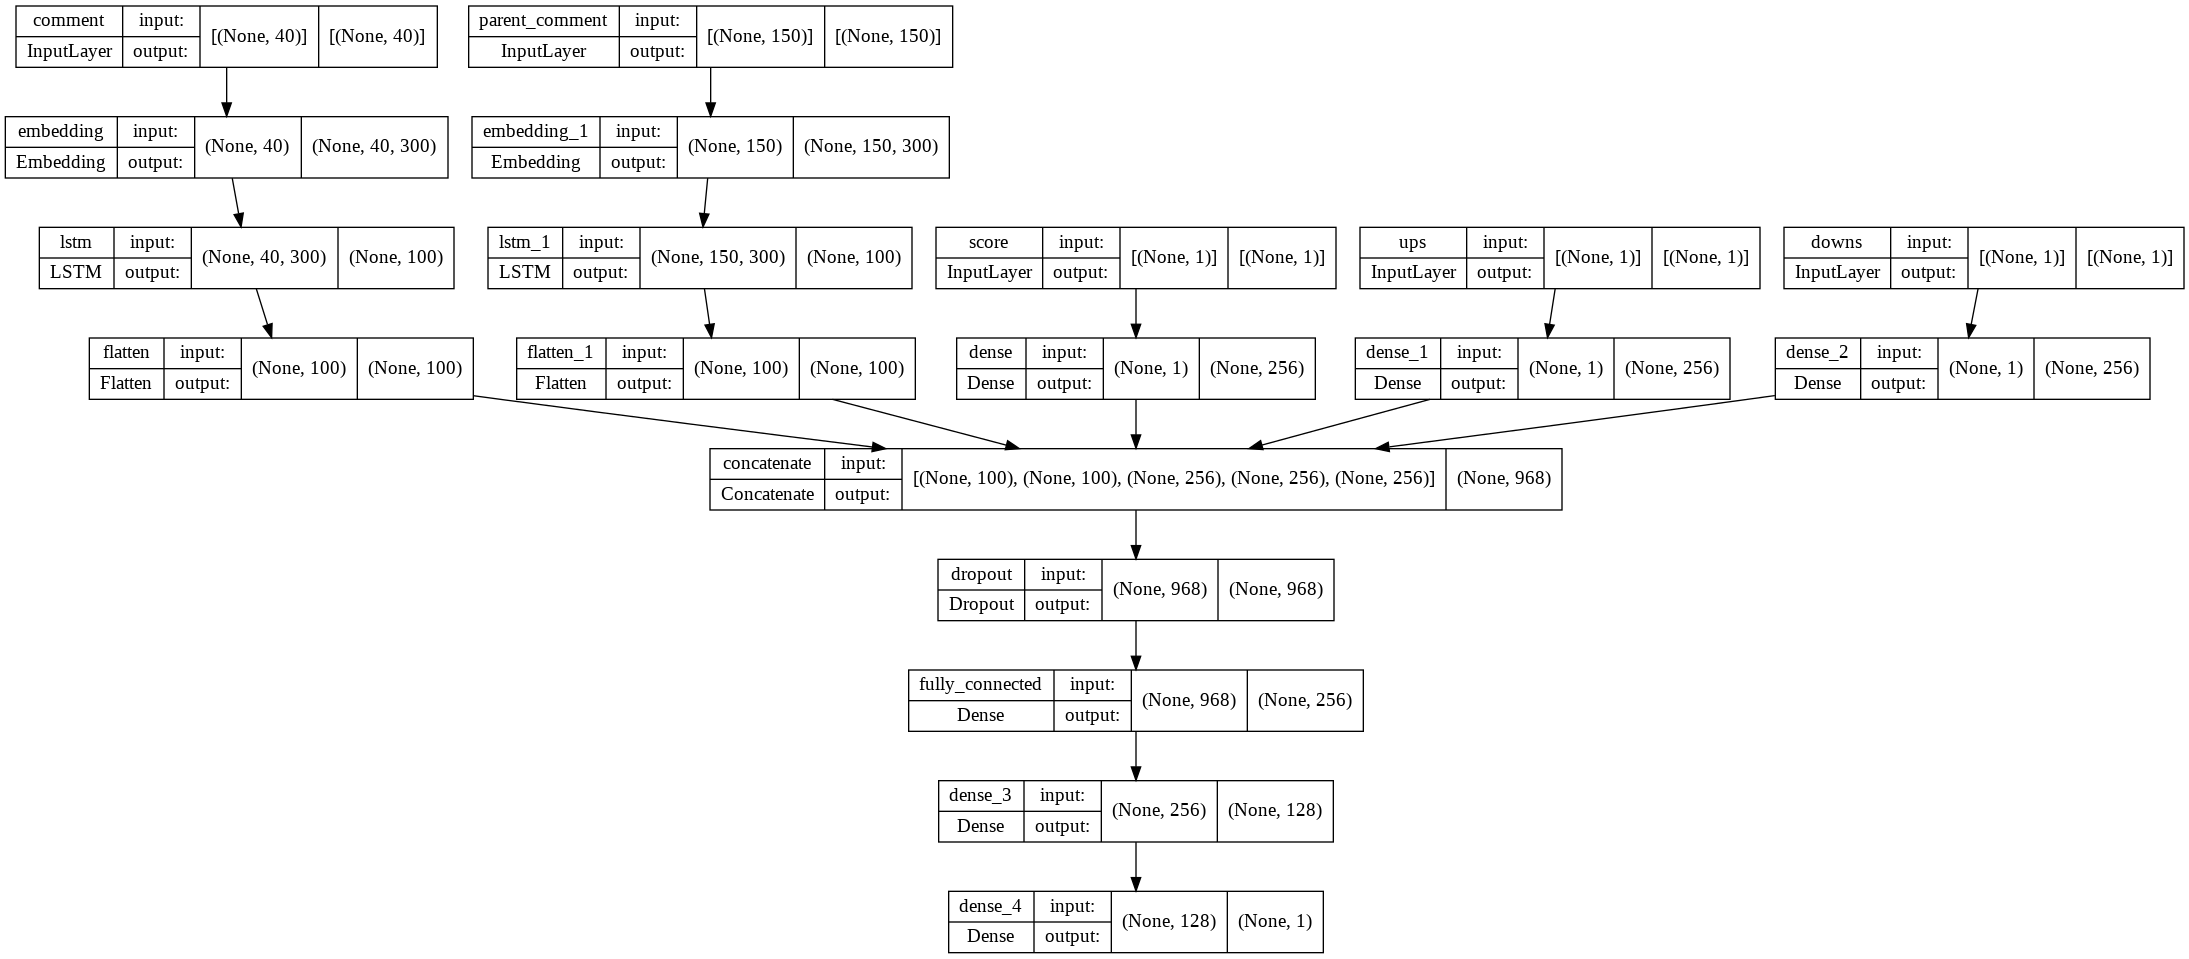

In [18]:
from tensorflow.keras.utils import plot_model

plot_model(model,
           to_file = 'model.png',
           show_shapes = True)

In [19]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer = Adam(),
                loss      = 'binary_crossentropy',
                metrics   = ['accuracy', precision, recall, f1_score])

In [20]:
X_train_data = [X_train_c_padding, 
                X_train_pc_padding, 
                X_train_score, X_train_ups, X_train_downs]

X_val_data   = [X_val_c_padding, 
                X_val_pc_padding, 
                X_val_score, X_val_ups, X_val_downs]

X_test_data  = [X_test_c_padding, 
                X_test_pc_padding, 
                X_test_score, X_test_ups, X_test_downs]

In [22]:
history = model.fit(x               = X_train_data, 
                    y               = y_train, 
                    batch_size      = 1024, 
                    epochs          = 50, 
                    validation_data = (X_val_data, 
                                       y_val), 
                    class_weight    = class_weight_dict,
                    callbacks       = callbacks_list)


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
548/548 [==============================] - 60s 93ms/step - loss: 0.5854 - accuracy: 0.6852 - precision: 0.7016 - recall: 0.6509 - f1_score: 0.6727 - val_loss: 0.5565 - val_accuracy: 0.7106 - val_precision: 0.7090 - val_recall: 0.7126 - val_f1_score: 0.7105 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0009999000574917021.
Epoch 2/50
548/548 [==============================] - 52s 96ms/step - loss: 0.5441 - accuracy: 0.7203 - precision: 0.7404 - recall: 0.6803 - f1_score: 0.7076 - val_loss: 0.5412 - val_accuracy: 0.7213 - val_precision: 0.7132 - val_recall: 0.7389 - val_f1_score: 0.7256 - lr: 9.9990e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.000999700106714659.
Epoch 3/50
548/548 [==============================] - 54s 98ms/step - loss: 0.5262 - accuracy: 0.7334 - precision: 0.7526 - recall: 0.6964 - f1_score: 0.7222 - val_loss: 0.5306 - val_accuracy: 0.

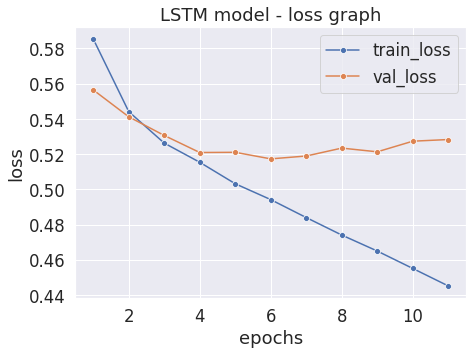

In [24]:
plot_metric(model_name = 'LSTM', history = history, metric = 'loss')

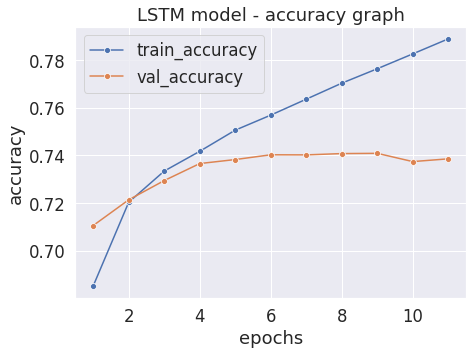

In [25]:
plot_metric(model_name = 'LSTM', history = history, metric = 'accuracy')

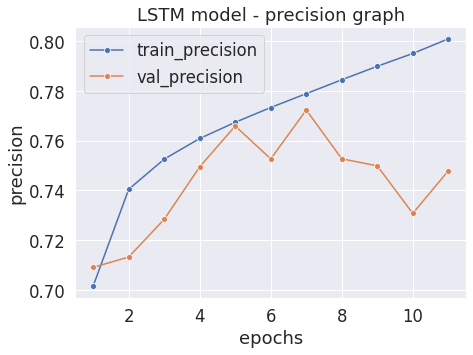

In [26]:
plot_metric(model_name = 'LSTM', history = history, metric = 'precision')

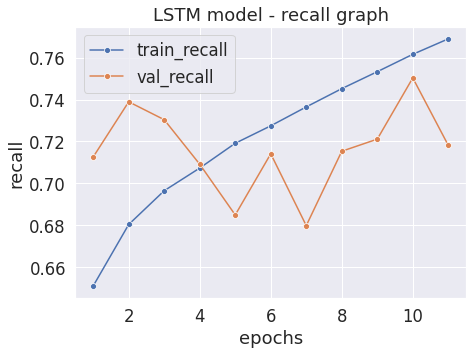

In [27]:
plot_metric(model_name = 'LSTM', history = history, metric = 'recall')

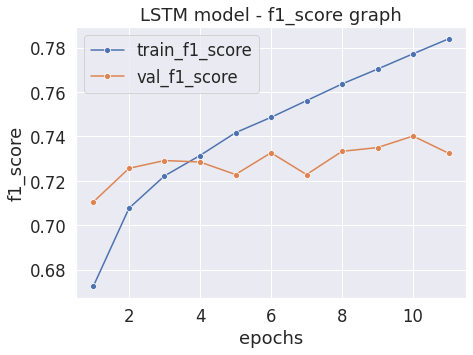

In [28]:
plot_metric(model_name = 'LSTM', history = history, metric = 'f1_score')

In [29]:
'''save_weights'''

model.save_weights('/content/drive/MyDrive/model_weights.hdf5')

In [30]:
'''load_weights'''

model.load_weights('/content/drive/MyDrive/model_weights.hdf5')

<pre>
<font color = 'blue'><b>Evaluate</b><font>

In [31]:
# train
l, a, p, r, f = model.evaluate(X_train_data, y_train)

17535/17535 [==============================] - 134s 8ms/step - loss: 0.4716 - accuracy: 0.7724 - precision: 0.7845 - recall: 0.7493 - f1_score: 0.7605


In [32]:
# val
l, a, p, r, f = model.evaluate(X_val_data, y_val)

3758/3758 [==============================] - 28s 8ms/step - loss: 0.5173 - accuracy: 0.7402 - precision: 0.7527 - recall: 0.7140 - f1_score: 0.7264


In [33]:
# test
l, a, p, r, f = model.evaluate(X_test_data, y_test)

3758/3758 [==============================] - 28s 7ms/step - loss: 0.5173 - accuracy: 0.7410 - precision: 0.7529 - recall: 0.7164 - f1_score: 0.7277


<pre>
<font color = 'blue'><b>Predict</b><font>

In [34]:
# predicted value
y_pred  = model.predict(X_test_data, verbose = 1)
y_pred  = np.where(y_pred > 0.5, 1, 0)
y_pred  = np.array(y_pred, dtype = int).tolist()

# true value
y_true  = y_test.tolist()

3758/3758 [==============================] - 22s 6ms/step


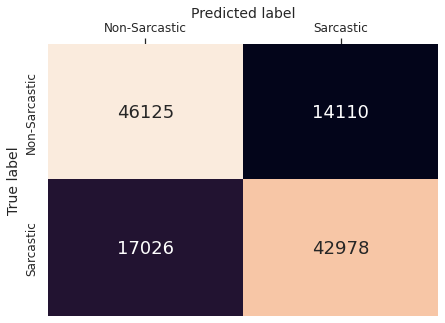

In [35]:
from sklearn.metrics import confusion_matrix

cm =  pd.DataFrame(confusion_matrix(y_true, y_pred), index = ['Non-Sarcastic','Sarcastic'], columns = ['Non-Sarcastic','Sarcastic'])
fig = plt.figure(figsize = (7, 5))

ax = sns.heatmap(cm, annot = True, cbar = False, fmt = 'd')
ax.set_ylabel('True label', fontsize = 14)
ax.set_xlabel('Predicted label', fontsize = 14)
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.tick_params(labelsize = 12)
plt.show()